In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2

from distortion_correction import *
from threshold_binary import *
from line_fit import *
from video_gen import *
%matplotlib inline

## 1. Distortion Correction


/home/mengling/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


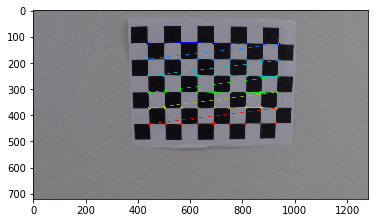

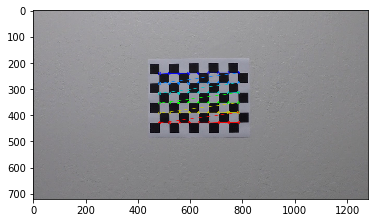

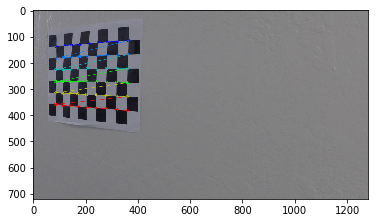

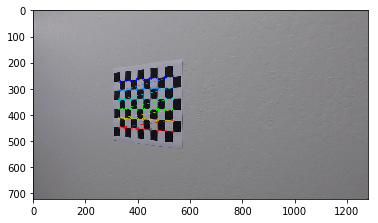

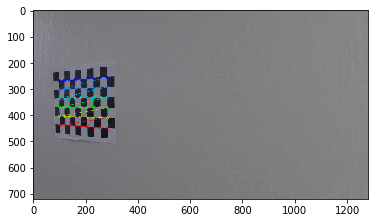

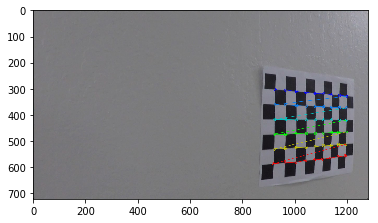

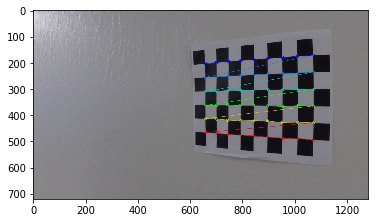

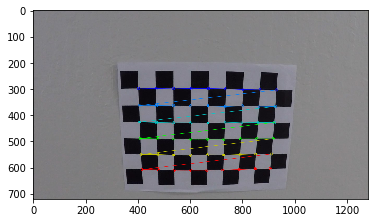

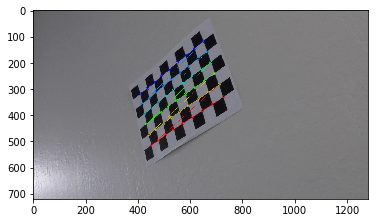

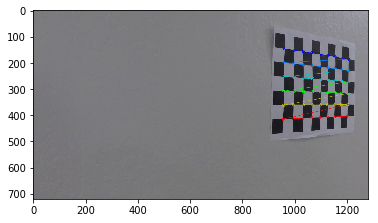

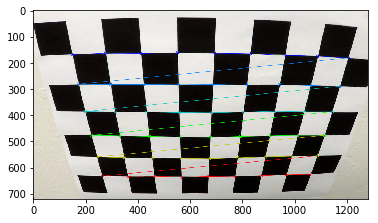

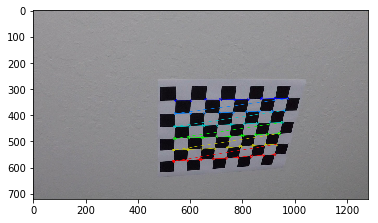

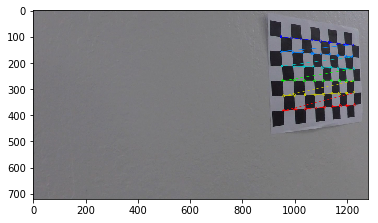

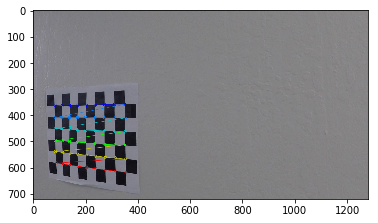

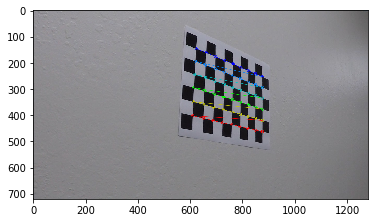

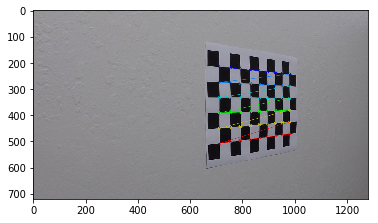

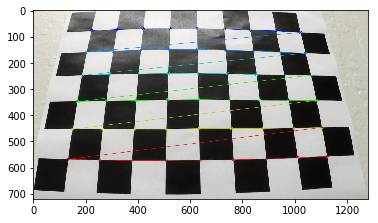

In [3]:
calib_dict = camera_calibration(nx=9, ny=6, path="camera_cal/calibration*.jpg", show=True)

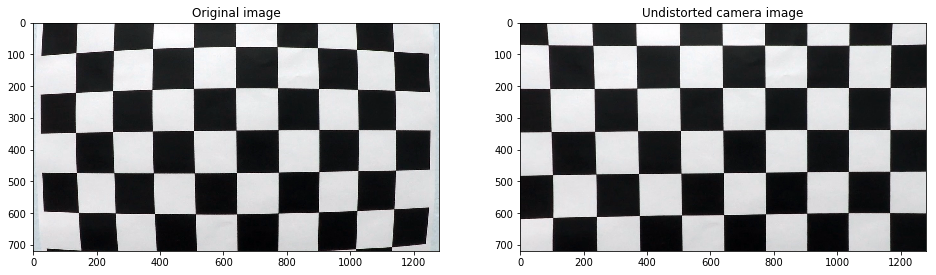

In [5]:
#Distortion corrected camera calibration image
image_orig = 'camera_cal/calibration1.jpg'
img = cv2.imread(image_orig)

calib_dict = camera_calibration(nx=9, ny=6, path="camera_cal/calibration*.jpg", show=False)
undist = undistort(img, calib_dict['mtx'], calib_dict['dist'])
plt.figure(figsize=(1,1))
fig = plt.figure(figsize=(16,12))
a=fig.add_subplot(121)
plt.imshow(img)
a.set_title('Original image')

a=fig.add_subplot(122)
plt.imshow(undist)
a.set_title('Undistorted camera image')

## 2 Lane Detection

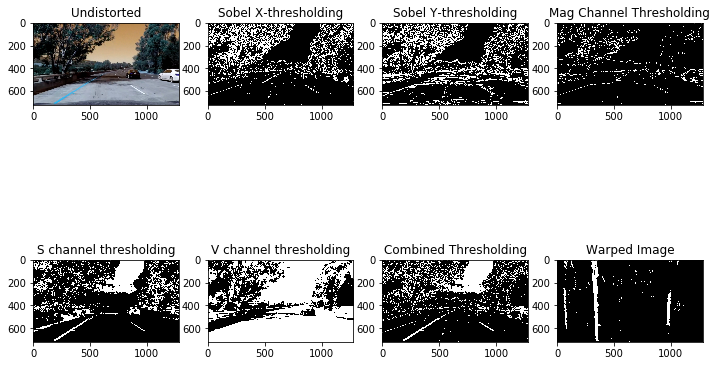

In [6]:
# On test image 3 first
img_path= 'test_images/test5.jpg'
img = cv2.imread(img_path)
undist, sobel_x_binary, sobel_y_binary, sobel_dir_binary, s_binary, v_binary, mag_binary, combined_binary, warped, Minv = combined_thres(img, calib_dict['mtx'], calib_dict['dist'])

#Plots 
plt.figure()
fig = plt.figure(figsize=(12,8))
a=fig.add_subplot(2,4,1)
plt.imshow(undist)
a.set_title('Undistorted')

a=fig.add_subplot(2,4,2)
plt.imshow(sobel_x_binary, cmap = 'Greys_r')
a.set_title('Sobel X-thresholding')

a=fig.add_subplot(2,4,3)
plt.imshow(sobel_y_binary, cmap = 'Greys_r')
a.set_title('Sobel Y-thresholding')

a=fig.add_subplot(2,4,4)
plt.imshow(mag_binary, cmap = 'Greys_r')
a.set_title('Mag Channel Thresholding')

a=fig.add_subplot(2,4,5)
plt.imshow(s_binary, cmap = 'Greys_r')
a.set_title('S channel thresholding')

a=fig.add_subplot(2,4,6)
plt.imshow(v_binary, cmap = 'Greys_r')
a.set_title('V channel thresholding')

a=fig.add_subplot(2,4,7)
plt.imshow(combined_binary,cmap = 'Greys_r')
a.set_title('Combined Thresholding')

a=fig.add_subplot(2,4,8)
plt.imshow(warped, cmap = 'Greys_r')
a.set_title('Warped Image')

## 3a. Line Fitting for images

[29250 29251 29252 ...  4393  4394  4395]
[29272 29273 29274 ...  4710  4711  4712]
33826.04397315724 m 18602.764123520337 m 0.06172796947696244 m
file name: test_images/straight_lines2.jpg
new file name test_images/straight_lines2_line_fit.jpg
[46712 46713 46714 ...  6711  6712  6713]
[46778 46779 46780 ...  6723  6724  6725]
2204.249971915462 m 742.2244275885184 m -0.016486073787932355 m
file name: test_images/test1.jpg
new file name test_images/test1_line_fit.jpg
[44199 44200 44201 ...  8941  8942  8943]
[44223 44224 44225 ...  8962  8963  8964]
8782.673228872854 m 1588.6451751474938 m 0.27882624716107884 m
file name: test_images/test2.jpg
new file name test_images/test2_line_fit.jpg
[61353 61354 61355 ... 14523 14524 14525]
[62487 62523 62524 ... 14601 14602 14603]
2066.3955815607637 m 1533.5813312392024 m 0.3458384329125394 m
file name: test_images/test4.jpg
new file name test_images/test4_line_fit.jpg
[45070 45071 45072 ...  6453  6454  6455]
[45130 45157 45158 ...  3911  3912  3

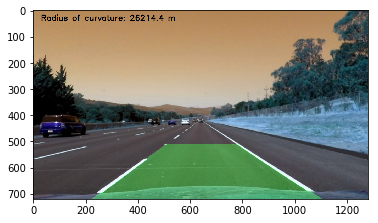

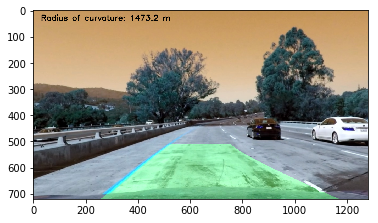

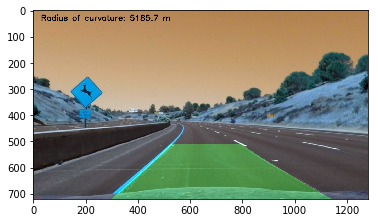

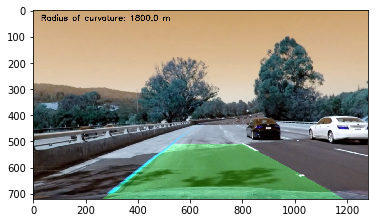

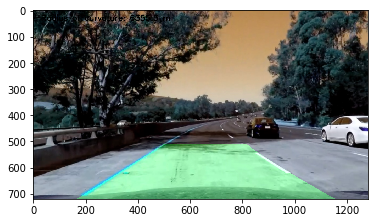

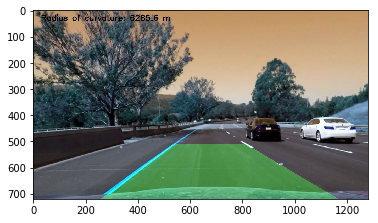

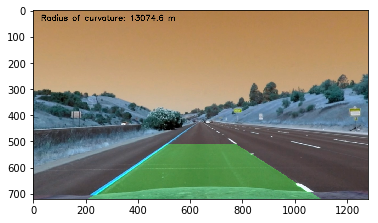

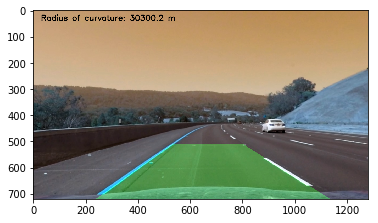

In [27]:
import glob
import os
new_path = os.path.join("test_images/","*.jpg")
for infile in glob.glob(new_path):
    img = cv2.imread(infile)
    undist, sobel_x_binary, sobel_y_binary, sobel_dir_binary, s_binary, v_binary, mag_binary, combined_binary, warped_im, Minv = combined_thres(img, calib_dict['mtx'], calib_dict['dist'])

    ret = fit_lines_first_img(warped_im)
    left_curve, right_curve, center = cal_curv(ret['left_fit'], ret['right_fit'], warped_im, print_data = True) 
    result  = plot_lines(undist, ret['left_fit'], ret['right_fit'], Minv, left_curve, right_curve)
    plt.figure(figsize=(10,10))
    fig = plt.figure()
    plt.imshow(result)
    print("file name:", infile)
    newfile_name = infile.split(".")[0] + '_line_fit' + '.jpg'
    print("new file name", newfile_name)
    cv2.imwrite(newfile_name, result)
    #Save result
    #outfile = create_pathname(infile, "_unpersp.jpg")  
    #cv2.imwrite(outfile, result)

## 3b. Line Fitting for videos

In [22]:
annotate_video('challenge_video.mp4', 'challenge_video_out.mp4')

[52449 52450 52451 ...  7886  7887  7888]
[52482 52483 52484 ...  7913  7914  7915]
3864.806347873047 m 4387.5408469622425 m 0.47184814754837173 m
[MoviePy] >>>> Building video challenge_video_out.mp4
[MoviePy] Writing video challenge_video_out.mp4


  0%|          | 1/485 [00:00<01:51,  4.34it/s]

[52449 52450 52451 ...  7886  7887  7888]
[52482 52483 52484 ...  7913  7914  7915]
3864.806347873047 m 4387.5408469622425 m 0.47184814754837173 m


  0%|          | 2/485 [00:00<01:54,  4.22it/s]

[52400 52401 52402 ...  8196  8197  8198]
[52429 52430 52431 ...  8225  8226  8227]
3656.5113431412806 m 2270.300352108515 m 0.4779482861796556 m


  1%|          | 3/485 [00:00<01:54,  4.22it/s]

[51527 51528 51529 ...  7599  7600  7601]
[51557 51558 51559 ...  7625  7626  7627]
3085.613670911562 m 3104.970668219354 m 0.4798312705988377 m


  1%|          | 4/485 [00:00<01:50,  4.35it/s]

[50559 50560 50561 ...  7033  7034  7035]
[50588 50589 50590 ...  7060  7061  7062]
2844.502234021574 m 3245.4994941507844 m 0.485070860950439 m
[49141 49142 49143 ...  6898  6899  6900]
[49167 49168 49169 ...  6907  6908  6909]


  1%|          | 5/485 [00:01<01:46,  4.52it/s]

3187.6079989654686 m 2962.13507206363 m 0.49576506124787983 m


  1%|          | 6/485 [00:01<01:45,  4.54it/s]

[49901 49902 49903 ...  7205  7206  7207]
[49938 49939 49940 ...  7226  7227  7228]
2779.7921374407842 m 3301.730885258108 m 0.5051267712959084 m


  1%|▏         | 7/485 [00:01<01:47,  4.46it/s]

[50438 50439 50440 ...  7615  7616  7617]
[50466 50467 50468 ...  7633  7634  7635]
2593.870837841863 m 5311.8633544984805 m 0.5123748934617584 m


  2%|▏         | 8/485 [00:01<01:48,  4.39it/s]

[50512 50513 50514 ...  8152  8153  8154]
[50541 50542 50543 ...  8179  8180  8181]
5755.286311222702 m 4980.366997134349 m 0.510918251153298 m


  2%|▏         | 9/485 [00:02<01:47,  4.43it/s]

[52778 52779 52780 ...  8515  8516  8517]
[52809 52810 52811 ...  8546  8547  8548]
11374.496357592903 m 3651.719530510613 m 0.516251830570848 m
[51399 51400 51401 ...  7979  7980  7981]
[51431 51432 51433 ...  8002  8003  8004]
1001463.9245617277 m 2562.8352760756816 m 0.5227543718221297 m


  2%|▏         | 11/485 [00:02<01:44,  4.55it/s]

[51558 51559 51560 ...  8026  8027  8028]
[51587 51588 51589 ...  8059  8060  8061]
17844.863748596264 m 3203.871475516234 m 0.5270827192808013 m


  2%|▏         | 12/485 [00:02<01:46,  4.46it/s]

[53625 53626 53627 ...  8274  8275  8276]
[53658 53659 53660 ...  8304  8305  8306]
14761.320306546972 m 3080.39275495077 m 0.5355963035761748 m


  3%|▎         | 13/485 [00:02<01:43,  4.55it/s]

[52180 52181 52182 ...  7868  7869  7870]
[52213 52214 52215 ...  7895  7896  7897]
16911.96099920401 m 2702.3553253662517 m 0.5425779830377383 m


  3%|▎         | 14/485 [00:03<01:42,  4.59it/s]

[55181 55182 55183 ...  9187  9188  9189]
[55214 55215 55216 ...  9214  9215  9216]
16324.13552197344 m 3019.652340931074 m 0.5455710255588023 m


  3%|▎         | 15/485 [00:03<01:41,  4.63it/s]

[53822 53823 53824 ...  8364  8365  8366]
[53855 53856 53857 ...  8391  8392  8393]
8882.19979681528 m 4161.844571181618 m 0.5475231016465939 m


  3%|▎         | 16/485 [00:03<01:39,  4.73it/s]

[55207 55208 55209 ...  8662  8663  8664]
[55240 55241 55242 ...  8689  8690  8691]
13464.260640079552 m 3971.20876303054 m 0.5493904156115994 m
[55201 55202 55203 ...  8298  8299  8300]
[55232 55233 55234 ...  8331  8332  8333]


  4%|▎         | 17/485 [00:03<01:36,  4.84it/s]

79094.29521345466 m 5112.901780819714 m 0.5441260079666917 m


  4%|▎         | 18/485 [00:03<01:36,  4.83it/s]

[53208 53209 53210 ...  8726  8727  8728]
[53238 53239 53240 ...  8755  8756  8757]
36676.57711437648 m 3018.6175918850004 m 0.5156375911496845 m


  4%|▍         | 19/485 [00:04<01:36,  4.81it/s]

[55450 55451 55452 ... 10177 10178 10179]
[55478 55479 55480 ... 10226 10227 10228]
13815.4486119057 m 2321.641458997498 m 0.5095599913259099 m


  4%|▍         | 20/485 [00:04<01:37,  4.79it/s]

[54226 54227 54228 ...  9803  9804  9805]
[54258 54259 54260 ...  9861  9862  9863]
32884.88452543117 m 2235.440775444612 m 0.49894464886570306 m


  4%|▍         | 21/485 [00:04<01:37,  4.78it/s]

[54819 54820 54821 ...  9804  9805  9806]
[54846 54847 54848 ...  9870  9871  9872]
291175.92790847307 m 7858.243602739452 m 0.504529343427677 m
[57073 57074 57075 ...  8900  8901  8902]
[57102 57103 57104 ...  8953  8954  8955]


  5%|▍         | 22/485 [00:04<01:34,  4.88it/s]

41402.900457718504 m 15721.676658292854 m 0.5063368910321153 m
[61035 61036 61037 ...  9072  9073  9074]
[61066 61067 61068 ...  9131  9132  9133]
9375.551526242509 m 1885.4677287210702 m 0.536750793863131 m


  5%|▍         | 24/485 [00:05<01:33,  4.91it/s]

[58052 58053 58054 ...  8478  8479  8480]
[58081 58082 58083 ...  8521  8522  8523]
3861.9955817647815 m 992.3635043143097 m 0.5790415487215275 m
[57313 57314 57315 ...  8111  8112  8113]
[57341 57342 57343 ...  8143  8144  8145]


  5%|▌         | 25/485 [00:05<01:33,  4.95it/s]

4411.436559059012 m 830.8859645829689 m 0.598782873773377 m


  5%|▌         | 26/485 [00:05<01:34,  4.85it/s]

[56788 56789 56790 ...  8099  8100  8101]
[56824 56825 56826 ...  8131  8132  8133]
5342.709098451225 m 743.3768005542314 m 0.6133421006459774 m
[56131 56132 56133 ...  7512  7513  7514]
[56158 56159 56160 ...  7546  7547  7548]


  6%|▌         | 28/485 [00:05<01:30,  5.05it/s]

4720.4264770230175 m 872.6933005841645 m 0.62792584844183 m
[55249 55250 55251 ...  7307  7308  7309]
[55277 55278 55279 ...  7335  7336  7337]
6911.025348524275 m 1049.022094992856 m 0.6313657028870913 m


  6%|▌         | 29/485 [00:06<01:32,  4.95it/s]

[55434 55435 55436 ...  7255  7256  7257]
[55462 55463 55464 ...  7284  7285  7286]
28783.32864701072 m 1980.3686028025452 m 0.6288901365446111 m
[53337 53338 53339 ...  6840  6841  6842]
[53367 53368 53369 ...  6871  6872  6873]
39908.90472918764 m 5480.182252490852 m 0.6276250019433083 m


  6%|▋         | 31/485 [00:06<01:30,  5.01it/s]

[52177 52178 52179 ...  7033  7034  7035]
[52206 52207 52208 ...  7060  7061  7062]
437793.251679078 m 3912.5477431608056 m 0.6130279433081928 m
[53091 53092 53093 ...  8014  8015  8016]
[53118 53119 53120 ...  8041  8042  8043]


  7%|▋         | 33/485 [00:06<01:28,  5.12it/s]

53824.55372281138 m 1078.0259592181524 m 0.5852412992052214 m
[51886 51887 51888 ...  9341  9342  9343]
[51912 51913 51914 ...  9375  9376  9377]
42702.094287251275 m 592.0257520097952 m 0.5373470056500168 m


  7%|▋         | 34/485 [00:07<01:27,  5.16it/s]

[54528 54529 54530 ... 10818 10819 10820]
[54555 54556 54557 ... 10870 10871 10872]
75020.32438177352 m 530.0472313264158 m 0.5038142610750531 m


  7%|▋         | 35/485 [00:07<01:29,  5.03it/s]

[55642 55643 55644 ...  9857  9858  9859]
[55682 55683 55684 ...  9939  9940  9941]
26296.665299054403 m 710.9378743185687 m 0.5018252373028054 m
[57993 57994 57995 ...  8357  8358  8359]
[58021 58022 58023 ...  8408  8409  8410]


  7%|▋         | 36/485 [00:07<01:29,  5.04it/s]

10259.800198128098 m 6538.56573230247 m 0.5402223625450109 m
[54720 54721 54722 ...  6683  6684  6685]
[54745 54746 54747 ...  6715  6716  6717]


  8%|▊         | 37/485 [00:07<01:29,  5.00it/s]

8064.552596603389 m 1012.6941593061072 m 0.6044014825430504 m


  8%|▊         | 38/485 [00:07<01:34,  4.71it/s]

[55314 55315 55316 ...  6785  6786  6787]
[55347 55348 55349 ...  6808  6809  6810]
22597.71485042981 m 508.32054782898774 m 0.6518832791476065 m


  8%|▊         | 40/485 [00:08<01:28,  5.03it/s]

[57614 57615 57616 ...  7072  7073  7074]
[57643 57644 57645 ...  7096  7097  7098]
119877.51803505058 m 409.2054415715738 m 0.6952100718725253 m
[58866 58867 58868 ...  7443  7444  7445]
[58889 58890 58891 ...  7466  7467  7468]
31684.980715123897 m 393.04836807470787 m 0.7215760282843532 m


  8%|▊         | 41/485 [00:08<01:28,  5.00it/s]

[58055 58056 58057 ...  7455  7456  7457]
[58086 58087 58088 ...  7486  7487  7488]
7068.413055729452 m 369.61470590091733 m 0.7467861395669901 m
[57180 57181 57182 ...  6970  6971  6972]
[57208 57209 57210 ...  7001  7002  7003]
6811.253647663505 m 441.56117277920276 m 0.7743387590252935 m


  9%|▉         | 43/485 [00:09<01:34,  4.69it/s]

[54797 54798 54799 ...  6775  6776  6777]
[54823 54824 54825 ...  6800  6801  6802]
2629.696544797006 m 579.8070057135526 m 0.7942325628076284 m


  9%|▉         | 44/485 [00:09<01:34,  4.65it/s]

[55045 55046 55047 ...  6719  6720  6721]
[55071 55072 55073 ...  6741  6742  6743]
1549.4239095178414 m 1210.1225007998023 m 0.7976296576790458 m
[53223 53224 53225 ...  7081  7082  7083]
[53283 53284 53285 ...  7108  7109  7110]
1800.1912812713654 m 3386.082691613306 m 0.7751631527563645 m


  9%|▉         | 46/485 [00:09<01:27,  5.00it/s]

[50453 50454 50455 ...  7816  7817  7818]
[50497 50498 50499 ...  7841  7842  7843]
1934.5550208936324 m 3165.046325168427 m 0.7731542124218707 m
[47908 47909 47910 ...  8521  8522  8523]
[47973 47974 47975 ...  8562  8563  8564]


 10%|▉         | 47/485 [00:09<01:28,  4.98it/s]

2844.1468166380605 m 9353.008620506187 m 0.765477233642998 m


 10%|▉         | 48/485 [00:10<01:30,  4.84it/s]

[49238 49239 49240 ...  8506  8507  8508]
[49282 49283 49284 ...  8571  8572  8573]
856.0598291086129 m 14240.670127968962 m 0.6327468842595657 m


 10%|█         | 49/485 [00:10<01:31,  4.74it/s]

[49975 49976 49977 ...  8888  8889  8890]
[49998 49999 50000 ...  8947  8948  8949]
1304.274935785455 m 10627.851961016395 m 0.6652048937558495 m
[47829 47830 47831 ...  7308  7309  7310]
[47850 47851 47852 ...  7366  7367  7368]
2185.370542612651 m 42005.32760930805 m 0.6715381119067513 m


 11%|█         | 52/485 [00:10<01:24,  5.11it/s]

[47758 47759 47760 ...  6006  6007  6008]
[47785 47786 47787 ...  6043  6044  6045]
2550.0017879230663 m 4988.31601419316 m 0.6832577195795991 m
[46827 46828 46829 ...  5740  5741  5742]
[46852 46853 46854 ...  5775  5776  5777]
2648.609583644361 m 24985.36792496421 m 0.6916404872396908 m


 11%|█         | 53/485 [00:11<01:25,  5.03it/s]

[44142 44143 44144 ...  5283  5284  5285]
[44169 44170 44171 ...  5314  5315  5316]
4006.690869360072 m 98426.8086813902 m 0.7007065085348732 m


 11%|█         | 54/485 [00:11<01:26,  4.98it/s]

[42565 42566 42567 ...  4977  4978  4979]
[42589 42590 42591 ...  5010  5011  5012]
8968.782495680738 m 5865.746989024553 m 0.7060910109405275 m


 11%|█▏        | 55/485 [00:11<01:29,  4.80it/s]

[44739 44740 44741 ...  5571  5572  5573]
[44764 44765 44766 ...  5604  5605  5606]
60115.55520885045 m 4282.53750539847 m 0.7079522108508431 m


 12%|█▏        | 56/485 [00:11<01:30,  4.73it/s]

[44284 44285 44286 ...  6105  6106  6107]
[44302 44303 44304 ...  6141  6142  6143]
1534.6010277608002 m 3801.912651336341 m 0.6651728996696274 m


 12%|█▏        | 57/485 [00:11<01:29,  4.80it/s]

[44470 44471 44472 ...  5951  5952  5953]
[44490 44491 44492 ...  5987  5988  5989]
471.27267438296485 m 2654.1397588944387 m 0.5565708611492837 m
[45771 45772 45773 ...  6114  6115  6116]
[45796 45797 45798 ...  6155  6156  6157]
517.5107601597502 m 1774.8996637009548 m 0.5840578610503283 m


 12%|█▏        | 59/485 [00:12<01:25,  4.96it/s]

[41754 41755 41756 ...  5623  5624  5625]
[41786 41787 41788 ...  5653  5654  5655]
397.62036677671597 m 2697.5123886452116 m 0.5110430789659917 m


 12%|█▏        | 60/485 [00:12<01:27,  4.87it/s]

[42423 42424 42425 ...  6461  6462  6463]
[42458 42459 42460 ...  6486  6487  6488]
417.2492557050546 m 16981.277520158197 m 0.5399269793925437 m


 13%|█▎        | 61/485 [00:12<01:30,  4.71it/s]

[44081 44082 44083 ...  7181  7182  7183]
[44110 44111 44112 ...  7222  7223  7224]
429.1085212758764 m 18331.028355943617 m 0.5747653612767903 m


 13%|█▎        | 63/485 [00:13<01:24,  4.98it/s]

[43404 43405 43406 ...  7411  7412  7413]
[43444 43445 43446 ...  7467  7468  7469]
410.24784760751857 m 33225.06408804252 m 0.5748119077657862 m
[43222 43223 43224 ...  7393  7394  7395]
[43255 43256 43257 ...  7447  7448  7449]
502.4527415481711 m 3064.210718963788 m 0.5637255182866235 m


 13%|█▎        | 64/485 [00:13<01:24,  4.97it/s]

[43711 43712 43713 ...  6849  6850  6851]
[43735 43736 43737 ...  6909  6910  6911]
1033.8998750390592 m 3654.72154182002 m 0.5842311243262255 m
[44130 44161 44162 ...  6178  6179  6180]
[44135 44136 44137 ...  6229  6230  6231]
2356.5574678737903 m 4345.886899689651 m 0.6283080982234275 m


 14%|█▎        | 66/485 [00:13<01:24,  4.98it/s]

[42662 42663 42664 ...  5729  5730  5731]
[42675 42676 42677 ...  5763  5764  5765]
2467.757099109087 m 2357.3089038557146 m 0.658357066184205 m
[42897 42898 42899 ...  5347  5348  5349]
[42911 42912 42913 ...  5378  5379  5380]


 14%|█▍        | 67/485 [00:13<01:24,  4.96it/s]

568.2558825708528 m 5600.335701714897 m 0.712584435236316 m


 14%|█▍        | 68/485 [00:14<01:26,  4.80it/s]

[43513 43514 43515 ...  5690  5691  5692]
[43526 43527 43528 ...  5716  5717  5718]
435.1747312006117 m 3063.867867605228 m 0.7531159991879419 m


 14%|█▍        | 69/485 [00:14<01:26,  4.83it/s]

[43109 43110 43111 ...  5766  5767  5768]
[43154 43155 43156 ...  5808  5809  5810]
501.2063872354501 m 2385.6811020012615 m 0.7652901114635942 m
[44436 44437 44438 ...  5374  5375  5376]
[44472 44473 44474 ...  5407  5408  5409]


 14%|█▍        | 70/485 [00:14<01:24,  4.93it/s]

611.7209030679103 m 1287.1879675545285 m 0.7591463475685037 m
[41561 41562 41563 ...  4900  4901  4902]
[41596 41597 41598 ...  4930  4931  4932]
520.8774185701803 m 77523.70156103278 m 0.8043173382558423 m


 15%|█▍        | 72/485 [00:14<01:25,  4.82it/s]

[39621 39622 39623 ...  5117  5118  5119]
[39642 39643 39644 ...  5150  5151  5152]
768.7245234805259 m 10989.767142946503 m 0.8134122083178094 m


 15%|█▌        | 73/485 [00:15<01:25,  4.82it/s]

[40561 40562 40563 ...  5130  5131  5132]
[40595 40596 40597 ...  5163  5164  5165]
867.1242731577278 m 14861.209369962105 m 0.8238060317130294 m
[38060 38061 38062 ...  4739  4740  4741]
[38090 38091 38092 ...  4758  4759  4760]
1120.8200705165468 m 6327.534163365175 m 0.8288956374848874 m


 15%|█▌        | 75/485 [00:15<01:23,  4.92it/s]

[39541 39542 39543 ...  5997  5998  5999]
[39569 39570 39571 ...  6039  6040  6041]
730.2888316900558 m 13945.506981020186 m 0.8538496616621565 m
[40478 40479 40480 ...  7754  7755  7756]
[40511 40512 40513 ...  7798  7799  7800]


 16%|█▌        | 76/485 [00:15<01:22,  4.95it/s]

763.3972966790618 m 2109.2864131565393 m 0.8400266824978162 m
[39783 39784 39785 ...  6490  6491  6492]
[39800 39801 39802 ...  6555  6556  6557]
876.860719091984 m 2471.8334413814873 m 0.8173702681139249 m


 16%|█▌        | 78/485 [00:16<01:23,  4.86it/s]

[41354 41355 41356 ...  5983  5984  5985]
[41375 41376 41377 ...  6042  6043  6044]
1272.2229722699356 m 14541.20488160952 m 0.8249047065270506 m


 16%|█▋        | 79/485 [00:16<01:24,  4.80it/s]

[41191 41192 41193 ...  5454  5455  5456]
[41214 41215 41216 ...  5505  5506  5507]
1210.995506447047 m 1792.950497202294 m 0.8484269372694119 m
[42320 42321 42322 ...  4659  4660  4661]
[42350 42351 42352 ...  4688  4689  4690]


 16%|█▋        | 80/485 [00:16<01:23,  4.83it/s]

1827.6553883805627 m 796.4862078029945 m 0.8658176033479095 m
[40801 40802 40803 ...  4791  4792  4793]
[40836 40837 40838 ...  4817  4818  4819]
1034.3316222178978 m 650.0400312313033 m 0.9034467182436895 m


 17%|█▋        | 82/485 [00:16<01:21,  4.92it/s]

[41149 41150 41151 ...  5002  5003  5004]
[41180 41181 41182 ...  5033  5034  5035]
1419.2760628080682 m 540.597364037846 m 0.9352613834495178 m
[36595 36596 36597 ...  3513  3514  3515]
[36603 36604 36605 ...  3537  3538  3539]


 17%|█▋        | 83/485 [00:17<01:21,  4.96it/s]

1216.2355458204154 m 543.783040366919 m 0.9275447263122394 m


 17%|█▋        | 84/485 [00:17<01:22,  4.85it/s]

[36065 36066 36067 ...  3153  3154  3155]
[36080 36081 36082 ...  3171  3172  3173]
1248.373946634316 m 647.2122086251478 m 0.9340579978036712 m
[34281 34282 34283 ...  2801  2802  2803]
[34301 34302 34303 ...  2811  2812  2813]


 18%|█▊        | 85/485 [00:17<01:22,  4.87it/s]

11030.977819248723 m 1369.6156613595176 m 0.9175909089755612 m
[35433 35434 35435 ...  3963  3964  3965]
[35450 35451 35452 ...  3979  3980  3981]
1287.4838520007545 m 1333.410570636855 m 0.8954198666779275 m


 18%|█▊        | 87/485 [00:17<01:18,  5.04it/s]

[34930 34931 34932 ...  2724  2725  2726]
[34961 34962 34963 ...  2749  2750  2751]
12658.262863070688 m 712.7381577607745 m 0.862973146837052 m
[33379 33380 33381 ...  3100  3101  3102]
[33410 33411 33412 ...  6784  6785  6786]
3036.984343145218 m 587.254651245219 m 0.8455509527274475 m


 18%|█▊        | 89/485 [00:18<01:16,  5.16it/s]

[30214 30215 30216 ...  3780  3781  3782]
[30233 30234 30235 ...  6262  6263  6264]
9138.30596856069 m 501.5301623280922 m 0.7973628691875165 m
[30326 30327 30328 ...  4624  4625  4626]
[30356 30357 30358 ... 11286 11287 11288]
675.1719013168465 m 796.5562862255149 m 0.8794220019047362 m


 19%|█▉        | 91/485 [00:18<01:15,  5.24it/s]

[30212 30213 30214 ...  5006  5007  5008]
[30238 30239 30240 ...  7183  7243  7303]
652.4171192062101 m 727.1570721003291 m 0.8636736473741512 m
[30794 30795 30796 ...  4692  4693  4694]
[30807 30808 30809 ...  9425  9426  9427]


 19%|█▉        | 92/485 [00:18<01:16,  5.17it/s]

1914.4645196113136 m 6973.653680764946 m 0.9198463392785263 m
[29913 29914 29915 ...  3123  3124  3125]
[29941 29942 29943 ... 11000 11001 11064]


 19%|█▉        | 93/485 [00:19<01:16,  5.10it/s]

7685.934244093247 m 3416.9141220677766 m 0.8828507003189638 m
[30339 30340 30341 ...  3020  3021  3022]
[30366 30367 30368 ... 12235 12236 12237]
1405.9089379732688 m 104028.18170255731 m 0.9353530805476546 m


 20%|█▉        | 95/485 [00:19<01:16,  5.12it/s]

[27795 27796 27797 ...  2980  2981  2982]
[27807 27808 27809 ... 13941 13942 13943]
4297.54163795705 m 2357.2038253983737 m 0.849847619633332 m
[25606 25607 25608 ...  2199  2200  2201]
[25632 25633 25634 ... 14837 14838 14839]
1213.9340964068658 m 648.3021232136629 m 0.6536946301675829 m


 20%|██        | 97/485 [00:19<01:17,  4.99it/s]

[24363 24364 24365 ...  2204  2205  2206]
[24375 24376 24377 ... 11100 11101 11102]
2041.8765448262473 m 1305.4848104893983 m 0.7465251563825557 m


 20%|██        | 98/485 [00:20<01:19,  4.87it/s]

[22592 22593 22594 ...  2909  2910  2911]
[23904 23905 23927 ...  4769  4770  4771]
1215.7758730512012 m 341.24257346512485 m 0.4090940035607043 m
[21969 21970 21971 ...  3173  3174  3175]
[22020 22092 22129 ...  6789  6807  6808]
1276.772304312226 m 389.9218759983702 m 0.47621131374249986 m


 21%|██        | 100/485 [00:20<01:15,  5.09it/s]

[21733 21734 21735 ...  3481  3482  3483]
[23025 23026 23049 ...  8434  8435  8436]
1200.4866664998676 m 428.7575205606094 m 0.5060934984170199 m
[22999 23000 23001 ...  3961  3962  3963]
[23011 23012 23013 ...   465   466   467]
1110.362191272789 m 1255.0411253493223 m 0.37521112292714504 m


 21%|██        | 102/485 [00:20<01:15,  5.09it/s]

[23391 23392 23393 ...  4382  4383  4384]
[23416 23417 23418 ...  2418  2466  2514]
1074.115357494473 m 2176.3811686413983 m 0.3648825623626634 m


 21%|██        | 103/485 [00:21<01:16,  5.00it/s]

[24295 24296 24297 ...  5424  5425  5426]
[24323 24324 24325 ...  5066  5067  5068]
785.642872166471 m 2333.7565157668305 m 0.3797729552441438 m


 21%|██▏       | 104/485 [00:21<01:16,  4.96it/s]

[23377 23378 23379 ...  5310  5311  5312]
[23399 23400 23401 ...  5330  5331  5332]
927.3071522446204 m 1925.6177886433936 m 0.3626374013517428 m
[25273 25274 25275 ...  5777  5778  5779]
[25302 25303 25304 ...  5783  5784  5785]
825.1742490488361 m 1089.4293176343238 m -0.22486433949183646 m


 22%|██▏       | 107/485 [00:21<01:13,  5.11it/s]

[26328 26329 26330 ...  5344  5345  5346]
[26355 26356 26357 ...  5352  5353  5354]
3782.409435896156 m 1127.5909124267544 m -0.25122154939000346 m
[26383 26384 26385 ...  4609  4610  4611]
[26410 26411 26412 ...  4613  4614  4615]
3487.0746966644724 m 1203.708546892212 m -0.2709220853292521 m


 22%|██▏       | 108/485 [00:22<01:16,  4.91it/s]

[25542 25925 25933 ...  2924  2925  2926]
[25512 25513 25514 ...  2928  2929  2930]
5662.008536616804 m 1156.1705807313554 m -0.2726226194851017 m


 22%|██▏       | 109/485 [00:22<01:19,  4.70it/s]

[26227 26228 26229 ...  3341  3342  3343]
[26235 26236 26237 ...  2670  2710  2711]
16429.76944591298 m 1358.437330390402 m -0.27599849738427074 m


 23%|██▎       | 110/485 [00:22<01:20,  4.64it/s]

[26266 26267 26268 ...  3577  3578  3579]
[27830 27831 27868 ... 10132 10133 10134]
2079.9830212060597 m 288.5227445757645 m 0.4604280326716457 m


 23%|██▎       | 111/485 [00:22<01:19,  4.69it/s]

[26644 26645 26646 ...  3633  3634  3635]
[27920 27921 27922 ... 13799 13800 13801]
2346.393256013516 m 247.97559546174563 m 0.5368856105914401 m
[26082 26083 26084 ...  3514  3515  3516]
[27746 27918 27919 ...   743   785   827]
1357.4911381328873 m 481.3069424696987 m 0.40962039768879915 m


 23%|██▎       | 113/485 [00:23<01:13,  5.05it/s]

[26321 26322 26323 ...  3766  3767  3768]
[27559 27560 28153 ...  3426  3427  3428]
2790.014306855057 m 620.0359045564664 m 0.35802611653968586 m


 24%|██▎       | 114/485 [00:23<01:17,  4.80it/s]

[27181 27182 27183 ...  3680  3681  3682]
[28211 28212 28291 ...  3690  3691  3692]
1244.6520137191103 m 820.4577171428667 m 0.3627382533874759 m


 24%|██▎       | 115/485 [00:23<01:19,  4.63it/s]

[26782 26783 26784 ...  3712  3713  3714]
[26803 26804 26805 ...  7040  7093  7094]
1202.21945038187 m 1398.9878184718757 m 0.34849877900429704 m
[25996 25997 25998 ...  3807  3808  3809]
[26021 26022 26023 ...  7304  7305  7306]


 24%|██▍       | 116/485 [00:23<01:17,  4.73it/s]

1271.9138493554192 m 5436.440435032899 m 0.3234409549932188 m


 24%|██▍       | 117/485 [00:24<01:18,  4.69it/s]

[26067 26068 26069 ...  4661  4662  4663]
[26089 26090 26091 ...  2698  2699  2700]
843.743779747554 m 7132.355169821216 m 0.33134943332263295 m


 24%|██▍       | 118/485 [00:24<01:17,  4.72it/s]

[27360 27361 27362 ...  5905  5906  5907]
[27384 27385 27386 ...  5919  5920  5921]
794.1734059568777 m 2076.907331520098 m 0.3627118839835974 m
[28590 28591 28592 ...  5151  5152  5153]
[28796 28824 28854 28855 28856 28885 28886 28887 28915 28916 28964 28989
 29014 29097 29098 29125 29126 29127 29156 29157 29158 29184 29185 29211
 29237 29265 29293 29294 29295 29323 29324 29325 29354 29355 29383 29384
 29438 29439 29466 29467 29493 29543 29570 29938 29939 29940 29941 29979
 29980 29981 29982 29983 29984 30023 30024 30025 30026 30027 30028 30068
 30069 30070 30114 30115 30116 30117 30161 30162 30163 30206 30207 30435
 30436 30506 30507 30582 30583 30584 30655 30656 30721 30722 30781 30782
 30827 30828 30868 30869 30911 30912 30958 30959 31003 31040 31077 31078
 31079 31107 31108 31109 31110 31111 31134 31135 31136 31137 31155 31156
 31157 31158 31178 31179 31180 31181 31202 26498 26531 26563 26564 26596
 26597 26625 26626 26654 26684 26713 27004 27005 27034 27035 27064 27095
 27500 275

 25%|██▍       | 120/485 [00:24<01:15,  4.85it/s]

[27167 27168 27169 ...  2805  2806  2807]
[27319 27346 27347 27373 27374 27402 27403 27430 27431 27457 27458 27459
 27484 27485 27486 27514 27515 27541 27542 27543 27568 27569 27594 27595
 27596 27626 27627 27628 27654 27655 27656 27657 27682 27683 27684 27685
 27686 27710 27711 27712 27713 27738 27739 27765 27791 27792 27793 27819
 27820 27845 27846 27872 27897 27898 27926 27927 27928 27929 27955 27956
 27957 27958 27984 27985 27986 27987 27988 28012 28013 28014 28015 28040
 28041 28042 28043 28068 28069 28070 28071 28072 28073 28074 28101 28102
 28127 28153 28175 28176 28177 28201 28202 28203 28204 28205 28229 28230
 28231 28232 28233 28258 28259 28335 28360 28385 28386 28411 28412 28413
 28414 28415 28441 28442 28443 28444 28445 28471 28472 28473 28474 28498
 28499 28500 28526 28527 28528 28554 28555 28556 28581 28582 28633 28634
 28659 28685 28686 28712 28713 28736 28759 28760 28783 28784 28807 28808
 28832 28833 28834 28858 28859 28860 28884 28885 28886 28908 28909 28932
 28933 28

 25%|██▍       | 121/485 [00:24<01:16,  4.74it/s]

[27193 27194 27195 ...  3283  3284  3285]
[27269 27270 27298 27299 27300 27329 27330 27359 27360 27388 27463 27491
 27518 27546 27572 27600 27731 27732 27733 27757 27758 27759 27783 27784
 27806 27831 27832 27833 27834 27857 27858 27859 27860 27885 27886 27887
 27888 28013 28064 28089 28090 28185 28212 28291 28316 28317 28346 28347
 28348 28349 28350 28376 28377 28378 28379 28380 28381 28407 28408 28409
 28410 28411 28412 28439 28440 28441 28442 28443 28444 28469 28470 28471
 28493 28494 28495 28518 28519 28520 28543 28544 28545 28567 28568 28569
 28593 28594 28711 28782 28805 28829 28830 28855 28856 28882 28883 28909
 28910 28911 28935 28936 28937 28960 28977 28978 28988 28989 29005 25454
 25455 25485 25486 25685 25714 25715 25744 25745 25776 25777 25778 25808
 25809 25839 25840 25870 25871 26257 26326 26357 26385 26693 27024 22363
 22398 22670 22703 22704 22705 22740 22741 22776 22777 22812 22847 23007
 23041 23075 23109 23144 23272 23305 23306 23340 23341 23375 23376 23377
 23378 23

 25%|██▌       | 122/485 [00:25<01:15,  4.82it/s]

[25304 25305 25306 ...  1755  1756  1757]
[25441 25469 25496 26154 26299 26326 26327 26355 26356 26383 26411 26483
 26507 26508 26509 26534 26535 26536 26562 26563 26564 26565 26590 26591
 26592 26593 26620 26621 26622 26623 26651 26652 26653 26680 26681 26708
 26709 26847 26942 26967 26968 26993 26994 27019 27020 27021 27047 27048
 27093 27094 27117 23140 23141 23142 23173 23174 23175 23176 23208 23209
 23210 23241 23242 23243 23274 23275 23306 23307 23338 23786 23815 23816
 23845 23846 23847 23876 23877 23908 24079 24080 24109 24110 24139 24140
 24141 24170 24171 24172 24173 24203 24204 24205 24235 24236 24237 24266
 24267 24296 24297 24325 24380 24381 24382 24413 24414 24415 24446 24447
 24448 24478 24479 24509 24510 24960 24961 22201 22235 22236 22269 22270
 22302 22303 22335 22336 22369 22370 17669 17670 17671 17712 17713 17714
 17754 17755 17756 17757 17797 17798 17799 17800 17840 17841 17842 17843
 17880 17881 17882 17883 17884 17921 17922 17923 17924 17925 17926 17962
 17963 17

 25%|██▌       | 123/485 [00:25<01:14,  4.83it/s]

[22910 22911 22912 ...     8     9    10]
[22936 22937 22938 22972 22973 23004 23202 23332 23358 23359 23387 23388
 23389 23419 23420 23450 23451 23452 23480 23481 23508 23509 23510 23511
 23539 23540 23541 23568 23569 23570 23597 23598 23599 23625 23626 23627
 23655 23656 23793 23823 23824 23853 24013 24039 24066 24067 24120 24121
 24147 24148 24149 24176 24177 24178 24206 24207 24208 24236 24237 24238
 24264 24265 24266 24291 24292 24293 24294 24319 24320 24321 24322 24347
 24348 24349 24350 24374 24375 24376 24595 24618 24619 24620 24644 24645
 24646 24670 24671 24672 24673 24697 24698 24699 24725 24726 24727 24752
 24753 24754 24755 24777 24778 24779 24780 24794 21494 21525 21555 21556
 21557 21558 21588 21589 21590 21591 21619 21620 21621 21650 21651 21652
 21683 21684 21685 21686 21717 21718 21719 21749 21750 21751 21781 21782
 21866 21867 21868 21898 21899 21900 21929 21930 21961 22249 22250 22283
 22284 22317 22318 22347 22379 22380 22414 22415 22446 22447 22448 22615
 22645 22

 26%|██▌       | 125/485 [00:25<01:12,  4.98it/s]

[17180 17181 17182 ...  1514  1515  1516]
[18220 18249 18250 ...  4185  4186  4187]
1474.1947979197137 m 469.4491480396259 m 0.6473381072338584 m


 26%|██▌       | 126/485 [00:25<01:15,  4.76it/s]

[15438 15439 15440 ...  3016  3017  3018]
[17311 17328 17343 ...  3043  3044  3045]
3228.8828033715126 m 206.11970959835477 m 0.8360733004291919 m


 26%|██▌       | 127/485 [00:26<01:14,  4.78it/s]

[13404 13405 13406 ...   485   486   487]
[14294 14319 14320 ...    56    57    58]
2157.7733829053336 m 1534.501720950049 m 0.44257000939962826 m
[11833 11834 11835 ...   157   158   159]
[13396 13715 13746 ...    87    88    89]
565.0568859105474 m 3392.3609540882403 m 0.28032829787426444 m


 27%|██▋       | 129/485 [00:26<01:09,  5.16it/s]

[8623 8624 8625 ...  137  138  139]
[8654 8655 8656 ...   53   54   55]
253.34938002559957 m 7729.702121839558 m -0.036072842504398135 m
[5917 5918 5919 ...    7    8    9]
[5955 5956 5957 ...  225  226  227]
331.42815956727964 m 2786.860700968984 m 0.004077763164774898 m


 27%|██▋       | 131/485 [00:26<01:09,  5.10it/s]

[3872 3873 3892 ...   47   48   49]
[3739 3740 3741 ...  186  187  188]
1435.2976424912597 m 852.9037381702506 m 0.36019600035300153 m
[2377 2378 2379 ...   30   31   32]
[2412 2413 2414 ...   68   69   70]
611.3954691792496 m 774.2343427906229 m 0.468882355413603 m


 27%|██▋       | 133/485 [00:27<01:06,  5.30it/s]

[589 590 591 ...  63  64  65]
[2023 2040 2076 2147 2148 2149 2150 2151 2152 2174 2175 2176 2177 2178
 2179 2180 2181 2182 2183 2184 2185 2186 2187 2188 2189 2202 2203 2204
 2205 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218
 2219 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247
 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2277 2278 2279
 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290 2291 2292 2293
 2294 2295 2296 2316 2317 2318 2319 2320 2321 2322 2323 2324 2325 2326
 2327 2328 2329 2330 2331 2346 2347 2348 2349 2350 2351 2352 2353 2354
 2355 2356 2357 2358 2359 2360 2361 2362 2363 2364 2365 2366 2367 2368
 2384 2385 2386 2387 2388 2389 2390 2391 2392 2393 2394 2395 2396 2397
 2398 2399 2400 2401 2402 2419 2420 2421 2422 2423 2424 2425 2426 2427
 2428 2429 2430 2431 2432 2433 2434 2435 2436 2437 2438 2449 2450 2451
 2452 2453 2454 2455 2456 2457 2458 2459 2460 2461 2462 2463 2469 2470
 2471 2472 2473 2474 2475 2476 2477 2478 2482 2

 28%|██▊       | 135/485 [00:27<01:06,  5.30it/s]

[655 656 657 658 659 660 722 726 491 506 533 534 535 536 539 540 541 542
 543 544 547 548 549 550 551 553 554 555 557 558 559 560 561 563 564 565
 566 567 568 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584
 585 586 587  98 100 103 107 239 240  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97]
[590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607
 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625
 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643
 644 645 646 647 648 649 650 651 652 653 654 701 702 704 705 706 707 708
 709 714 715 716 717 718 723 724 725 727 728 729 730 366 367 368 369 370
 371 372 373 374 375 377 378 379 381 382 383 384 385 386 387 388 389 390
 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426
 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 4

 28%|██▊       | 137/485 [00:27<01:03,  5.44it/s]

[ 934  935  936  937  940  941 1035  709  710  732  737  738  742  743
  744  745  746  747  751  752  753  754  755  759  760  762  763  764
  765  766  770  771  772  773  774  777  778  779  780  781  782  787
  788  789  790  791  792  793  799  800  801  807  808  552  553  554
  555  556  557  558  559  560  561  562  563  564  565  566  567  568
  569  571  572  574  575  596  597  598  599  600  601  500  501  502
  503  504  505  506  507  508  509  510  511  512  513  514  515  516
  517  518  519  520  521  522  523  524  525  526  527  528  529  530
  531  532  533  534  535  536  537  538  539  540  541  542  543  544
  545  546  547  548  549  550  551   14   15   16   17   18   19   20
   21   22   23   24   25   26   27   28   29   30   31   32   33   34
   35   36   37   38  160  161  162  163  164  165  166  167  168  169
  170  171  172  173  174  175  176  177  178  179  180  181  182  183
  184  185  186  187  188  189  190  191  192  193  194  195  196  197
  198 

 28%|██▊       | 138/485 [00:28<01:06,  5.19it/s]

[873 876 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817
 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835
 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853
 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870 871
 872 643 645 647 648 651 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 289 290
 291 293 294 295 296 299 300 301 302 305 306 307 309 310 311 314 315 318
 319 321 322 323 326 327 328 331 332 333 334 337 338 339 340 343 344 345
 347 348 349 351   0   1   2   3   4   5   6   7   8   9  10  11  12  13
  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  4

 29%|██▊       | 139/485 [00:28<01:08,  5.03it/s]

[1425 1426 1427 1370 1371 1372 1373 1374 1375 1376 1377 1378 1379 1380
 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391 1392 1393 1394
 1395 1396 1397 1398 1399 1400 1401 1402 1403 1404 1405 1406 1407 1408
 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422
 1423 1424 1153 1157 1186 1187 1188 1189 1190 1193 1196 1203 1207 1208
 1213 1259 1264 1265 1270 1352 1353 1354 1355 1356 1357 1358 1359 1360
 1361 1362 1363 1364 1365 1366 1367 1368 1369 1077 1086 1087 1093 1094
 1095 1101 1102 1103 1109 1110  600  601  602  603  604  605  606  607
  608  609  610  611  612  613  614  615  616  617  618  619  620  621
  622  623  624  625  626  627  628  629  630  631  632  633  634  635
  636  637  638  639  640  641  642  643  644  645  646  647  648  649
  650  651  652  653  654  655  656  657  658  659  660  661  662  663
  664  665  666  667  668  669  670  671  672  673  674  675  676  677
  678  679  680  681  682  683  684  685  686  687  688  689  690  691
  692 

 29%|██▉       | 140/485 [00:28<01:09,  4.98it/s]

[2891 2892 2893 ... 1002 1003 1004]
[2954 2955 2956 2957 2980 3007 3008 3009 3028 3029 3030 3031 3032 3033
 3034 3035 3036 3054 3055 3056 3057 3058 3059 3060 3082 3083 3084 3085
 3086 3104 3105 3106 3107 2690 2691 2692 2693 2694 2695 2696 2697 2698
 2699 2700 2701 2702 2703 2704 2705 2706 2707 2708 2709 2710 2711 2712
 2713 2714 2715 2716 2717 2718 2719 2720 2721 2723 2724 2725 2726 2728
 2729 2730 2732 2733 2734 2736 2737 2738 2740 2741 2742 2743 2745 2746
 2747 2748 2749 2750 2751 2752 2754 2755 2756 2758 2759 2760 2761 2762
 2763 2764 2765 2766 2767 2768 2769 2770 2771 2772 2773 2774 2775 2776
 2777 2778 2779 2780 2781 2782 2783 2784 2785 2786 2787 2788 2789 2790
 2791 2792 2793 2794 2795 2796 2797 2798 2799 2800 2801 2802 2803 2804
 2805 2806 2807 2808 2809 2810 2811 2812 2813 2814 2815 2816 2817 2818
 2819 2820 2821 2822 2823 2824 2825 2827 2828 2829 2830 2831 2833 2834
 2835 2836 2837 2838 2839 2840 2852 2855 2403 2404 2405 2406 2407 2408
 2409 2410 2411 2412 2413 2414 2415 2416 

 29%|██▉       | 142/485 [00:28<01:05,  5.23it/s]

[4597 4598 4218 ...  414  415  416]
[4574 4575 4576 4577 4578 4579 4580 4581 4582 4583 4584 4585 4586 4587
 4588 4589 4590 4591 4592 4593 4594 4595 4596 4687 4706 4707 4708 4731
 4732 4733 4734 4735 4757 4758 4759 4760 4761 4780 4781 4782 4804 4805
 4828 4829 4830 4831 4856 4857 4223 4224 4225 4226 4227 4228 4229 4230
 4235 4236 4237 4238 4239 4240 4241 4246 4247 4248 4249 4250 4251 4252
 4254 4255 4256 4257 4258 4259 4262 4263 4264 4265 4266 4267 4270 4271
 4272 4273 4276 4277 4278 4279 4280 4283 4284 4285 4286 4290 4291 4292
 4295 4296 4297 4299 4300 4301 4302 4303 4304 4305 4307 4308 4309 4310
 4312 4313 4314 4315 4317 4318 4319 4320 4323 4324 4325 4327 4328 4329
 4330 4332 4333 4334 4335 4337 4338 4339 4340 4341 4344 4345 4346 4347
 4350 4351 4352 4354 4355 4356 4357 4359 4360 4361 4362 4365 4366 4367
 4368 4369 4372 4373 4374 4375 4378 4379 4380 4382 4383 4384 4402 4403
 4404 4405 4406 4407 4408 4412 4413 4414 4417 4418 4419 4422 4423 4424
 4425 4426 4427 4430 4431 4432 4433 4434 

 29%|██▉       | 143/485 [00:29<01:08,  4.99it/s]

[4297 4302 4317 ...  183  184  185]
[4288 4289 4290 4291 4292 4293 4294 4295 4296 4298 4299 4300 4301 4303
 4304 4305 4306 4307 4308 4309 4310 4311 4312 4313 4314 4315 4316 4324
 4328 4330 4331 4332 4333 4334 4335 4336 4337 4338 4339 4340 4341 4342
 4343 4344 4345 4346 4347 4348 4349 4350 4351 4352 4353 4354 4355 4356
 4357 4358 4359 4360 4361 4362 4363 4364 4365 4366 4367 4368 4369 4370
 4371 4372 4373 4374 4375 4376 4377 4378 4379 4380 4381 4382 4383 4384
 4385 4386 4387 4388 4389 4390 4391 4392 4393 4394 4395 4396 4397 4398
 4399 4400 4401 4402 4403 4405 4406 4408 4409 4410 4411 4414 4415 4416
 4417 4418 4419 4420 4421 4422 4423 4424 4425 4426 4427 4428 4429 4430
 4431 4432 4433 4434 4435 4436 4437 4438 4439 4440 4441 4442 4443 4444
 4445 4446 4447 4448 4449 4450 4451 4452 4453 4454 4455 4456 4457 4458
 4461 4496 4497 4511 4525 4526 4527 4528 4544 4545 4546 4547 4548 4562
 4563 4564 4581 4582 4583 4584 4585 4602 4603 4604 4605 4606 4607 4608
 3924 3925 3926 3927 3929 3930 3931 3932 

 30%|██▉       | 145/485 [00:29<01:08,  4.98it/s]

[6499 6500 6501 ... 1434 1435 1436]
[6504 6505 6510 ... 2673 2674 2675]
2941.1331139951562 m 1141.5901613686958 m 0.39167782611470314 m


 30%|███       | 147/485 [00:30<01:07,  4.98it/s]

[7334 7336 7337 ... 3562 3563 3564]
[7499 7500 7501 7502 7507 7508 7509 7510 7511 7512 7513 7514 7515 7516
 7517 7518 7519 7520 7521 7526 7527 7528 7529 7530 7531 7541 7542 7543
 7544 7545 7546 7560 7561 7562 7563 7564 7565 7575 7576 7577 7578 7579
 7580 7581 7609 7610 7611 7612 7613 7614 7615 7642 7643 7644 7645 7646
 7647 7648 7662 7663 7664 7665 7666 7667 7684 7685 7686 7687 7688 7689
 7690 7699 7700 7701 7702 7703 7704 7705 7706 7707 7723 7724 7725 7726
 7727 7728 7729 7730 7731 7732 7750 7751 7752 7753 7754 7755 7756 7757
 7758 7759 7760 7761 7775 7776 7777 7778 7779 7780 7781 7782 7783  374
  375  376  433  434  435  488  489  490  543  544  545  546  599  600
  601  602  654  655  656  657  711  712  713  714  767  768  769  770
  824  825  826  827  881  882  883  884  936  937  938  939  940  994
  995  996  997  998  999 1053 1054 1055 1056 1057 1058 1059 1060 1117
 1118 1119 1120 1121 1122 1123 1124 1182 1183 1184 1185 1186 1187 1188
 1189 1190 1248 1249 1250 1251 1252 1253 

 31%|███       | 149/485 [00:30<01:04,  5.17it/s]

[12418 12419 12420 ...  4615  4616  4617]
[12457 12460 12461 12469 12470 12471 12472 12473 12474 12475 12476 12477
 12478 12479 12480 12481 12482 12483 12484 12485 12486 12487 12488 12489
 12490 12491 12492 12493 12494 12495 12496 12497 12498 12502 12503 12504
 12505 12506 12507 12516 12517 12527 12528 12546 12547 12548 12561 12562
 12563 12564 12565 12586 12587 12588 12589 12612 12613 12614 12615 12616
 12617 12618 12619 12620 12621 12638 12639 12640 12641 12642 12643 12667
 12668 12669 12670 12671 12672 12673 12674 12675 12676 12677 12691 12692
 12693 12694 12695 12696 12697 12698 12699 12718 12719 12720 12721 12722
 12723 12724 12725 12726 12727 12728 12747 12748 12749 12750 12751 12752
 12753 12754 12755 12756  9960  9969  9979  9989  9999  8249  8250  8251
  8252  8253  8254  8255  8256  8291  8292  8293  8294  8295  8296  8297
  8298  8333  8334  8335  8336  8337  8338  8339  8340  8371  8372  8373
  8374  8375  8376  8377  8378  8408  8409  8410  8411  8412  8413  8443
  8444  8

 31%|███       | 150/485 [00:30<01:03,  5.32it/s]

[16502 16503 16504 ...  3921  3922  3923]
[16518 16519 16523 16532 16533 16535 16536 16537 16540 16541 16543 16560
 16561 16565 16566 16567 16570 16589 16592 16593 16597 16615 16623 16624
 16625 16626 16627 16628 16630 16631 16632 16635 16637 16638 16639 16640
 16641 16642 16643 16644 16645 16646 16647 16648 16650 16651 16652 16653
 16654 16655 16666 16676 16677 16693 16694 16707 16708 16709 16710 16728
 16729 16730 16731 16751 16752 16753 16754 16755 16756 16757 16758 16785
 16786 16787 16788 16789 16790 16791 16792 16793 16822 16823 16824 16825
 16826 16827 16828 16829 16830 16831 16864 16865 16866 16867 16868 16869
 16870 16871 16872 16873 16907 16908 16909 16910 16911 16912 16913 16914
 16915 16945 16946 16947 16948 16949 16950 16951 16952 16974 16975 16976
 16977 16978 16979 16980 16981 16982 16983 16233 16240 16250 16259 16268
 15747 15758 11979 11980 11981 11982 11983 11984 12014 12015 12016 12017
 12018 12019 12020 12050 12051 12052 12053 12054 12055 12056 12088 12089
 12090 12

 31%|███       | 151/485 [00:30<01:04,  5.17it/s]

[19369 19370 19371 ...  3875  3876  3877]
[19610 19628 19641 ... 12265 12266 12267]
3763.764631702136 m 595.4605010319351 m 0.3165124006045541 m


 31%|███▏      | 152/485 [00:30<01:07,  4.97it/s]

[21555 21556 21557 ...  3962  3963  3964]
[21697 21698 21700 ... 11342 11343 11344]
1099.3510528915574 m 456.8841252981325 m 0.3981498617669394 m


 32%|███▏      | 153/485 [00:31<01:07,  4.89it/s]

[23179 23180 23181 ...  4188  4189  4190]
[23526 23527 23534 ...  2148  2201  2202]
796.2537605046122 m 1073.7085119520043 m 0.3059775110458532 m


 32%|███▏      | 154/485 [00:31<01:08,  4.82it/s]

[24496 24497 24498 ...  3897  3898  3899]
[24849 24860 24868 ...  3901  3902  3903]
693.4478008109794 m 1105.8138169910808 m 0.30822387798943357 m


 32%|███▏      | 155/485 [00:31<01:08,  4.80it/s]

[26088 26089 26090 ...  3921  3922  3923]
[26653 26654 26662 ...  6094  6148  6149]
868.2252996049864 m 2161.4890135390924 m 0.3042728471897348 m
[27027 27028 27029 ...  3810  3811  3812]
[27030 27031 27032 ...  7642  7643  7644]
879.5537843114679 m 4706.858326109733 m 0.29968877062249444 m


 32%|███▏      | 157/485 [00:32<01:07,  4.84it/s]

[27650 27651 27652 ...  3628  3629  3630]
[27663 27664 27665 ... 10239 10285 10286]
1386.8137349173353 m 1743.6954020480218 m 0.26229551831718967 m


 33%|███▎      | 158/485 [00:32<01:10,  4.66it/s]

[27011 27012 27013 ...  4371  4372  4373]
[27033 27034 27035 ...  2627  2628  2629]
1044.7667104175966 m 6166.018076772356 m 0.2839025453530911 m
[26937 26938 26939 ...  5109  5110  5111]
[26951 26952 26953 ...  5127  5128  5129]


 33%|███▎      | 160/485 [00:32<01:05,  4.99it/s]

836.7089091665005 m 1046.0319998523466 m 0.29346658648684487 m
[28257 28258 28259 ...  5533  5534  5535]
[28329 28330 28359 28360 28389 28390 28420 28421 28446 29203 29250 29251
 29299 29300 29301 29356 29357 29358 29359 29360 29416 29417 29418 29419
 29420 29482 29483 29484 29485 29547 29548 29616 29617 29809 29810 29863
 29864 29919 29920 29921 29985 29986 29987 30048 30104 30327 30377 30378
 30430 30431 30485 30486 30487 30542 30543 30544 30596 30597 30643 30644
 30645 30683 30684 30685 30686 30714 30715 30716 30741 30742 30768 30769
 30770 30798 30799 30800 30828 30829 30830 30857 30858 30859 30883 30884
 30906 30907 30908 30936 30937 30938 30962 30963 30964 30965 30966 30992
 30993 30994 31021 31022 31023 31024 31025 31026 31027 31067 31068 31069
 31070 31071 31072 31114 31115 31116 31117 31118 31119 31166 31167 31168
 31169 31170 31171 31172 31209 31210 31211 31212 31213 31214 31215 31216
 31217 31256 31257 31258 31259 31260 31261 31262 31263 31264 31265 31301
 31302 31303 31304 

 33%|███▎      | 161/485 [00:32<01:07,  4.82it/s]

[28536 28537 28538 ...  5190  5191  5192]
[28780 28824 28869 29058 29086 29141 29142 29173 29174 29175 29209 29210
 29211 29212 29249 29250 29251 29252 29253 29289 29323 29324 29457 29458
 29459 29460 29487 29488 29489 29517 29928 29956 29986 29987 29988 30018
 30019 30020 30021 30022 30049 30050 30051 30077 30078 30104 30105 30132
 30133 30159 30160 30188 30189 30217 30218 30219 30247 30248 30274 30275
 30303 30304 30305 30332 30333 30359 30360 30361 30387 30388 30389 30415
 30416 30417 30443 30444 30469 30470 30471 30495 30496 30497 30521 30522
 30523 30549 30550 30551 30577 30578 30601 30602 30618 30619 30620 30621
 30636 30637 30657 30658 30659 30660 30685 30686 30687 30709 30710 30711
 30750 30751 30752 30753 30754 30755 30795 30796 30797 30798 30799 30800
 30801 30802 30803 30804 30838 30839 30840 30841 30842 30843 30844 30845
 30846 30847 30848 30849 30850 30884 30885 30886 30887 30888 30889 30890
 30891 30892 30893 30926 30927 30928 30929 30930 30931 30932 30933 30934
 30935 30

 33%|███▎      | 162/485 [00:33<01:06,  4.86it/s]

1486.416490755582 m 5590.543489613219 m -0.30666135470519007 m
[29677 29678 29679 ...  3784  3785  3786]
[29698 29699 29700 29730 29731 29732 29733 29979 30007 30064 30065 30066
 30096 30097 30098 30099 30128 30129 30130 30131 30159 30160 30161 30190
 30191 30218 30219 30220 30221 30249 30250 30251 30252 30282 30283 30284
 30312 30313 30314 30340 30341 30342 30368 30369 30370 30371 30372 30373
 30400 30401 30402 30403 30429 30430 30431 30459 30460 30488 30489 30490
 30491 30519 30520 30521 30547 30548 30549 30574 30575 30576 30577 30602
 30603 30604 30605 30628 30629 30630 30631 30803 30829 30849 30850 30870
 30871 30892 30933 30934 30959 30960 30961 30962 30987 30988 30989 30990
 31014 31015 31016 31017 31044 31045 31046 31047 31075 31076 31077 31104
 31105 31132 31133 31134 31162 31163 31164 31193 31194 31195 31221 31222
 31223 31224 31251 31252 31253 31280 31281 31282 31283 31311 31312 31313
 31341 31342 31343 31370 31371 31372 31402 31403 31429 31430 31456 31457
 31458 31482 31483 

 34%|███▍      | 164/485 [00:33<01:03,  5.02it/s]

[27556 27557 27558 ...  3307  3308  3309]
[27579 27686 27768 27769 27770 27800 27801 27802 27831 27832 27833 27834
 27835 27836 27865 27866 27867 27868 27869 27897 27898 27899 27900 27901
 27928 27929 27957 27958 27987 27988 28017 28018 28019 28045 28046 28047
 28073 28074 28075 28102 28128 28129 28155 28156 28183 28210 28211 28238
 28239 28267 28268 28269 28297 28298 28299 28409 28410 28517 28518 28545
 28546 28574 28601 28602 28603 28629 28630 28856 28857 28858 28859 28886
 28887 28888 28889 28915 28916 28917 28918 28919 28949 28950 28951 28952
 28980 28981 28982 29007 29008 29009 29035 29036 29037 29065 29066 29067
 29094 29095 29096 29125 29126 29153 29154 29181 29182 29209 29210 29211
 29235 29236 29237 29260 29261 29262 29285 29286 29314 29315 29344 29345
 29373 29374 29375 29402 29403 29430 29431 29432 29458 29459 29460 29461
 29484 29485 29504 29505 29516 29532 29533 29547 29548 29549 29550 29574
 29575 29576 29577 29578 29579 29606 29607 29608 29609 29610 29611 29612
 29613 29

 34%|███▍      | 166/485 [00:33<01:02,  5.07it/s]

[27895 27896 27897 ...  3351  3352  3353]
[28359 28391 28392 ... 10577 10578 10579]
1565.975826057306 m 439.09294450132404 m 0.4059373107739746 m
[27324 27325 27326 ...  3421  3422  3423]
[28683 28684 28717 ... 13782 13783 13784]
1618.3112913303498 m 194.7493509552359 m 0.6173362183330275 m


 35%|███▍      | 168/485 [00:34<01:02,  5.04it/s]

[28398 28399 28400 ...  4439  4440  4441]
[29227 29228 29256 ... 18438 18439 18440]
9856.77397733392 m 180.4844665746221 m 0.7439924714973365 m


 35%|███▍      | 169/485 [00:34<01:03,  4.96it/s]

[30154 30155 30156 ...  5652  5653  5654]
[31926 31954 31955 ... 23320 23321 23322]
24438.59079792694 m 115.10086145817219 m 1.1980474262162086 m


 35%|███▌      | 170/485 [00:34<01:03,  4.93it/s]

[28795 28796 28797 ...  3599  3600  3601]
[28822 28823 28824 ... 11224 11266 11267]
3210.3286899149653 m 884.5934718447946 m 0.35100254738451764 m


 35%|███▌      | 171/485 [00:34<01:03,  4.92it/s]

[27975 27976 27977 ...  3774  3775  3776]
[28004 28005 28006 ...  1718  1719  1720]
4926.413718179867 m 1376.275162582724 m 0.2584845395605385 m
[28071 28072 28073 ...  4618  4619  4620]
[28107 28108 28109 ...  4343  4344  4345]
3072.4150543159517 m 2159.939160707167 m 0.26943803803054756 m


 36%|███▌      | 174/485 [00:35<00:59,  5.24it/s]

[28692 28693 28694 ...  5217  5218  5219]
[28738 28739 28740 ...  5239  5240  5241]
1351.1045725265824 m 2170.0646713416877 m 0.28276598802781633 m
[28782 28783 28784 ...  5104  5105  5106]
[28995 29887 29991 30076 30077 30078 30079 30107 30108 30109 30110 30111
 30143 30144 30145 30146 30177 30178 30179 30210 30243 30287 30336 30337
 30396 30457 30458 30515 30516 30577 30578 30638 30639 30700 30701 30760
 30761 30762 30818 30819 30872 30873 30922 30923 30924 30973 30974 31023
 31024 31071 31072 31073 31123 31169 31209 31210 31211 31253 31287 31288
 31289 31307 31308 31309 31310 31333 31334 31335 31359 31360 31361 31384
 31385 31386 31387 31410 31411 31412 31413 31414 31415 31431 31432 31433
 31434 31435 31450 31451 31452 31453 26644 26645 26646 26674 26675 26676
 26705 26706 26707 26737 26738 26990 26991 27022 27023 27024 27055 27056
 27057 27058 27090 27091 27092 27093 27126 27127 27128 27162 27163 27164
 27199 27200 27201 27238 27239 27240 27277 27278 27279 27310 27311 27312
 27341 

 36%|███▌      | 175/485 [00:35<01:00,  5.14it/s]

[30050 30051 30052 ...  4708  4709  4710]
[30073 30074 30104 30105 30106 30107 30136 30137 30138 30167 30168 30169
 30197 30198 30199 30227 30228 30229 30254 30255 30256 30257 30284 30311
 30312 30338 30339 30340 30341 30368 30369 30370 30371 30372 30399 30400
 30401 30402 30430 30431 30432 30433 30434 30462 30463 30464 30465 30493
 30494 30495 30523 30692 30720 30721 30748 30749 30777 30831 30832 30862
 30863 30892 30893 30894 30920 30921 30922 31051 31078 31129 31153 31154
 31227 31228 31229 31255 31256 31331 31332 31361 31362 31363 31364 31392
 31393 31394 31395 31420 31421 31422 31423 31448 31449 31450 31476 31477
 31504 31534 31562 31563 31591 31592 31619 31620 31650 31651 31679 31680
 31681 31707 31708 31709 31735 31736 31761 31762 31763 31791 31792 31820
 31821 31848 31849 31879 31880 31906 31907 31934 31935 31965 31989 31990
 31991 32009 32036 32037 32061 32062 32063 32091 32092 32093 32123 32124
 32125 32126 32153 32154 32155 32156 32157 32180 32181 32182 32183 32184
 32200 32

 36%|███▋      | 176/485 [00:35<01:02,  4.93it/s]

[29639 29640 29641 ...  3478  3479  3480]
[29862 29891 29892 29925 29926 29927 29960 29961 29962 29993 29994 30023
 30238 30266 30267 30380 30381 30412 30413 30414 30415 30416 30446 30447
 30448 30449 30450 30451 30479 30480 30481 30482 30483 30484 30512 30513
 30514 30542 30570 30597 30623 30624 30652 30653 30654 30680 30731 30732
 30733 30734 30761 30762 30763 30764 30845 30846 30847 30848 30875 30876
 30877 30957 30958 30959 30987 30988 30989 30990 31015 31016 31017 31018
 31019 31047 31048 31049 31050 31076 31077 31078 31106 31107 31136 31164
 31196 31197 31227 31228 31259 31260 31293 31294 31325 31326 31327 31357
 31358 31359 31386 31387 31410 31411 31436 31437 31463 31464 31489 31518
 31519 31544 31545 31568 31569 31597 31598 31599 31600 31601 31623 31633
 31634 31674 31675 31698 31699 31700 31752 31753 31754 31778 31779 31780
 31781 31782 31804 31805 31826 31827 31840 31841 27871 27902 27934 27935
 27936 27965 27966 27967 27995 27996 27997 28028 28029 28030 28346 28347
 28378 28

 37%|███▋      | 178/485 [00:36<01:02,  4.92it/s]

[29204 29205 29206 ...  3071  3072  3073]
[29851 29878 29879 29905 29906 29960 29988 30016 30098 30099 30100 30126
 30127 30128 30226 30252 30253 30426 30427 30453 30454 30481 30482 30483
 30507 30508 30509 30534 30535 30560 30561 30587 30588 30589 30614 30615
 30616 30642 30643 30668 30694 30695 30722 30723 30748 30749 30750 30776
 30777 30778 30803 30804 30829 30830 30855 30856 30882 30883 30908 30909
 30935 30981 31030 31031 31082 31083 31095 31096 31097 31113 31114 31115
 31144 31145 31146 31173 31174 31175 31176 31177 31178 31179 31206 31207
 31208 31209 31210 31211 31212 31240 31241 31266 31286 31287 26671 26672
 26709 26710 26711 26749 26750 26787 26788 26820 27113 27114 27115 27147
 27148 27149 27183 27184 27185 27186 27187 27188 27220 27221 27222 27223
 27224 27225 27226 27259 27260 27261 27262 27263 27297 27298 27299 27300
 27301 27302 27338 27339 27340 27373 27374 27410 27411 27448 27449 27450
 27486 27487 27488 27523 27524 27525 27526 27562 27563 27564 27565 27601
 27602 27

 37%|███▋      | 179/485 [00:36<01:03,  4.83it/s]

[28733 28734 28735 ...  3175  3176  3177]
[28769 29630 29688 ...  9977  9978  9979]
24198.2002358211 m 788.9571905473986 m 0.3028647819451344 m


 37%|███▋      | 180/485 [00:36<01:04,  4.72it/s]

[27443 27444 27445 ...  3266  3267  3268]
[29845 30077 30105 ... 13544 13545 13546]
11534.50013069964 m 239.294796002385 m 0.4717021910049356 m


 37%|███▋      | 181/485 [00:36<01:04,  4.68it/s]

[28366 28367 28368 ...  3494  3495  3496]
[28995 29287 29288 ...   708   744   745]
28669.08050303356 m 449.49793354673875 m 0.2973742166947828 m


 38%|███▊      | 182/485 [00:37<01:06,  4.58it/s]

[27720 27721 27722 ...  3507  3508  3509]
[27779 27780 27781 ...  3511  3512  3513]
5794.298306782719 m 477.61509869437907 m 0.28743865740210334 m
[28096 28097 28098 ...  3614  3615  3616]
[29686 29718 29719 ...  6189  6232  6233]


 38%|███▊      | 183/485 [00:37<01:04,  4.72it/s]

6320.616058977594 m 501.82440074202435 m 0.3121498406209062 m
[27980 27981 27982 ...  3480  3481  3482]
[28011 28012 28013 ...  7159  7160  7161]


 38%|███▊      | 185/485 [00:37<01:00,  4.97it/s]

3129.664025892667 m 1575.6938138114187 m 0.27584607719505866 m
[27034 27035 27036 ...  3937  3938  3939]
[27062 27063 27064 ...  1746  1747  1748]
4280.291992676903 m 5925.471020304722 m 0.2464143595856527 m


 38%|███▊      | 186/485 [00:37<01:00,  4.97it/s]

[26820 26821 26822 ...  5024  5025  5026]
[26849 26850 26851 ...  4763  4764  4765]
2935.223330105136 m 2458.7710289613105 m 0.2503700518810466 m


 39%|███▊      | 187/485 [00:38<01:00,  4.94it/s]

[29026 29027 29028 ...  7277  7278  7279]
[29219 29220 29256 ...  7301  7302  7303]
1938.742868662655 m 1702.6812549306885 m 0.26110033900303975 m
[31791 31792 31793 ...  8793  8794  8795]
[32238 32239 32265 ...  8821  8822  8823]


 39%|███▉      | 188/485 [00:38<00:59,  4.98it/s]

4241.639525196187 m 4609.571672361248 m -0.2715796033416002 m
[34036 34037 34038 ...  6307  6308  6309]
[34398 34462 34463 ...  6351  6352  6353]
1573.7044592732782 m 987.2508257530367 m -0.27834474288957783 m


 39%|███▉      | 190/485 [00:38<00:57,  5.15it/s]

[32549 32550 32551 ...  3413  3414  3415]
[32568 32569 32570 ...  3429  3430  3431]
1429.4256420552124 m 1258.5018176846547 m -0.27300380404506924 m
[32496 32497 32498 ...  3115  3116  3117]
[32519 32520 32521 ...  7923  7924  7925]


 39%|███▉      | 191/485 [00:38<00:57,  5.12it/s]

2179.3144272000372 m 556.4008965956915 m -0.3372178374412469 m
[33685 33686 33687 ...  3416  3417  3418]
[33709 33710 33711 ...   719   720   760]


 40%|███▉      | 192/485 [00:39<00:57,  5.05it/s]

1524.8781706255713 m 835.8700997184069 m -0.3135568184600388 m
[33173 33174 33175 ...  3559  3560  3561]
[33200 33201 33202 ...   223   267   315]


 40%|███▉      | 193/485 [00:39<00:58,  5.00it/s]

2405.597089279709 m 848.2335660877573 m 0.3138828958019966 m


 40%|████      | 194/485 [00:39<00:59,  4.93it/s]

[33248 33249 33250 ...  3489  3490  3491]
[34356 34357 34444 ...  2717  2758  2759]
1262.554021303855 m 1924.0379708801813 m 0.2821397233540257 m
[31102 31103 31104 ...  3093  3094  3095]
[32631 32682 33073 ...  4439  4440  4441]


 40%|████      | 195/485 [00:39<00:58,  4.97it/s]

1392.8000404851277 m 743.9242824506262 m 0.3198879920666084 m


 40%|████      | 196/485 [00:39<00:59,  4.83it/s]

[31341 31342 31343 ...  3448  3449  3450]
[33257 33287 33303 ...  6404  6405  6444]
1018.6042297904555 m 679.6041987605774 m 0.39559591131089217 m
[31365 31366 31367 ...  3598  3599  3600]
[31386 31387 31388 ...  8940  8984  9029]
1031.4372084366498 m 6604.823334561626 m 0.29337299455279997 m


 41%|████      | 198/485 [00:40<00:57,  4.98it/s]

[31024 31025 31026 ...  3773  3774  3775]
[31055 31056 31057 ...   945   990   991]
1410.470689440741 m 4230.645033883901 m 0.2682903546635981 m


 41%|████      | 199/485 [00:40<00:58,  4.88it/s]

[29192 29193 29194 ...  4459  4460  4461]
[29237 29238 29239 ...  3307  3308  3309]
1374.069883532451 m 6455.0267694501035 m 0.2728977703698301 m


 41%|████      | 200/485 [00:40<01:01,  4.65it/s]

[26941 26942 26943 ...  5222  5223  5224]
[26994 26995 26996 ...  5234  5235  5236]
1551.922507432852 m 3764.2453894380596 m 0.27316368397540514 m


 41%|████▏     | 201/485 [00:40<01:01,  4.65it/s]

[26509 26510 26511 ...  5273  5274  5275]
[27284 27325 27326 ...  5295  5296  5297]
1104.7490964970884 m 2603.981281378727 m 0.2792368543807294 m


 42%|████▏     | 202/485 [00:41<01:03,  4.49it/s]

[25794 25795 25796 ...  4528  4529  4530]
[25811 25812 25865 25866 25867 25868 25895 25896 25897 25898 25925 25926
 25927 25928 25929 25956 25957 25958 25959 26011 26012 26013 26041 26042
 26921 26922 26951 26952 26980 26981 26982 27009 27010 27011 27038 27039
 27066 27067 27068 27095 27096 27122 27123 27124 27148 27149 27150 27175
 27176 27177 27178 27205 27206 27207 27232 27233 27234 27258 27259 27260
 27286 27287 27315 27316 27342 27343 27344 27371 27372 27373 27400 27401
 27402 27403 27427 27428 27429 27451 27452 27453 27474 27475 27476 27503
 27504 27532 27533 27534 27559 27560 27583 27584 27606 27607 27608 27621
 27622 27632 27633 27634 27635 27636 27642 27643 27644 27655 27665 27712
 27725 27737 24605 24633 24634 24635 24665 24666 24667 24697 24698 24699
 24729 24730 24760 25397 25423 25730 25731 25758 25759 25784 25785 21165
 21166 21198 21199 21229 21230 21260 21261 21289 21290 21319 21320 21349
 21350 21936 21937 21968 21969 21970 21971 22002 22003 22004 22037 22038
 22039 22

 42%|████▏     | 203/485 [00:41<01:00,  4.69it/s]

[26500 26501 26502 ...  3683  3684  3685]
[26649 26650 26651 26678 26679 26680 26681 26708 26709 26710 26711 26737
 26738 26788 26842 26843 26871 26872 26899 26900 26953 26978 27002 27003
 27004 27030 27031 27032 27114 27115 27139 27140 27141 27142 27167 27168
 27169 27170 27194 27195 27220 27221 27248 27249 27250 27276 27277 27278
 27304 27305 27592 27621 27622 27652 27653 27654 27737 27738 27739 27764
 27765 27766 27788 27789 27790 27816 27817 27818 27819 27840 27841 27842
 27865 27866 27892 27893 27916 27917 27918 27942 27943 27944 27969 27970
 27971 27997 27998 27999 28025 28026 28027 28028 28052 28053 28054 28076
 28077 28078 28079 28101 28102 28103 28127 28128 28150 28151 28152 28176
 28177 28178 28179 28203 28204 28205 28227 28228 28229 28247 28248 28249
 28267 28268 28269 28291 28292 28293 28294 28308 28309 28315 28316 28317
 28318 28319 28322 28323 28329 28330 28355 28407 28408 24284 24285 24286
 24315 24316 24317 24350 24351 24352 24386 24387 24388 24420 24421 24451
 24452 24

 42%|████▏     | 204/485 [00:41<00:59,  4.73it/s]

[26579 26580 26581 ...  3223  3224  3225]
[26919 26920 26948 26949 26977 26978 26979 27004 27005 27006 27032 27033
 27060 27061 27113 27402 27426 27449 27450 27475 27476 27720 27749 27750
 27776 27777 27778 27802 27803 27804 27805 27829 27830 27831 27832 27857
 27858 27859 27860 27861 27887 27888 27889 27890 27917 27918 27919 27944
 27945 27946 27971 27972 27973 27997 27998 27999 28023 28024 28025 28049
 28050 28051 28078 28079 28080 28081 28106 28107 28108 28132 28133 28134
 28156 28157 28158 28181 28182 28206 28207 28231 28232 28233 28254 28255
 28277 28278 28279 28301 28302 28303 28324 28325 28326 28344 28345 28346
 28358 28359 28360 28367 28368 28369 28370 28374 28375 28384 28385 28397
 28455 28483 28484 24477 24478 24479 24509 24510 24511 24542 24543 24544
 24573 24574 24575 24603 24604 24605 24633 24634 24663 24664 24914 24944
 25956 25957 25985 25986 26014 26015 26016 26044 26045 26073 26074 26101
 26128 26211 26212 26238 26239 26266 26267 26294 26295 26322 26323 26403
 26404 26

 42%|████▏     | 206/485 [00:42<00:57,  4.87it/s]

[25283 25284 25285 ...  3399  3400  3401]
[25602 25629 25927 ...  9765  9766  9767]
1408.9600439352655 m 1240.2418683005187 m 0.2986081939250121 m
[26520 26521 26522 ...  3646  3647  3648]
[26955 26956 26957 ...  1349  1350  1398]
1522.3619886184488 m 1183.6080087051303 m 0.28334827000076035 m


 43%|████▎     | 208/485 [00:42<00:55,  4.98it/s]

[27163 27164 27165 ...  3857  3858  3859]
[27633 27634 27897 ...  2984  3030  3031]
2765.064452451591 m 1186.052663337686 m 0.271243694871293 m
[25941 25942 25943 ...  3210  3211  3212]
[26552 26553 26579 ...  2905  2906  2907]


 43%|████▎     | 209/485 [00:42<00:55,  5.00it/s]

1452.2255384595294 m 7778.24703608476 m 0.2393319500417838 m
[25411 25412 25413 ...  2889  2890  2891]
[25764 25765 25794 ...  5573  5574  5575]
5724.147021596557 m 3144.023310700997 m 0.23387896741346767 m


 44%|████▎     | 211/485 [00:43<00:55,  4.97it/s]

[26999 27000 27001 ...  3391  3392  3393]
[27028 27029 27030 ...  8880  8881  8920]
1470.7157797479506 m 2597.848888724322 m 0.2148399539484184 m
[26153 26154 26155 ...  3995  3996  3997]
[26175 26176 26177 ...  2861  2862  2863]


 44%|████▍     | 213/485 [00:43<00:53,  5.13it/s]

1383.3518107718091 m 23485.886233952315 m 0.24187270363581403 m
[26135 26136 26137 ...  5278  5279  5280]
[26158 26159 26160 ...  5295  5296  5297]
1249.472211753504 m 5628.183065517526 m 0.24555658302661768 m


 44%|████▍     | 214/485 [00:43<00:51,  5.28it/s]

[26584 26585 26586 ...  5656  5657  5658]
[26613 26614 26615 ...  5679  5680  5681]
2014.0034217593234 m 2499.4617150326517 m 0.24464143316193582 m
[27871 27872 27873 ...  5380  5381  5382]
[27982 28013 28014 ...  5409  5410  5411]
1585.2464581564284 m 1268.4678455637047 m 0.26372259039543844 m


 45%|████▍     | 216/485 [00:43<00:54,  4.93it/s]

[28038 28039 28040 ...  4883  4884  4885]
[28637 28737 28738 28765 28766 28792 28793 28819 28820 28847 28875 28902
 28903 28956 28983 29009 29010 29036 29037 29110 29184 29185 29186 29212
 29213 29214 29240 29241 29242 29267 29268 29269 29270 29295 29296 29297
 29324 29325 29326 29352 29353 29354 29378 29379 29380 29404 29405 29406
 29431 29432 29456 29457 29458 29481 29482 29483 29576 29577 29600 29601
 29627 29628 29655 29656 29657 29687 29688 29689 29714 29715 29716 29740
 29741 29742 29766 29767 29768 29792 29793 29814 29815 29830 29831 29844
 29845 29854 29855 29856 29863 29864 29872 29873 29888 29889 29931 29932
 29933 26028 26029 26058 26059 23198 23199 23200 23201 23236 23237 23238
 24010 24101 24133 24202 24237 24238 24273 24274 24275 24310 24311 24312
 24313 24314 24349 24350 24351 24352 24353 24386 24387 24388 24389 24390
 24424 24425 24426 24427 24428 24461 24462 24463 24464 24496 24497 24498
 24499 24532 24533 24534 24567 24568 24569 25029 25059 25060 25091 25092
 25122 25

 45%|████▍     | 217/485 [00:44<00:56,  4.78it/s]

[27480 27481 27482 ...  3832  3833  3834]
[27814 27841 27869 ...  3772  3835  3836]
1881.7312199579192 m 2967.6764539099245 m -0.2887641477798155 m


 45%|████▍     | 218/485 [00:44<00:56,  4.76it/s]

[27762 27763 27764 ...  3613  3614  3615]
[27924 27953 27954 ...  3573  3616  3617]
1126.0946733426595 m 2276.9561782007454 m -0.27250288579380044 m
[25795 25796 25797 ...  3129  3130  3131]
[25823 25824 25825 25851 25852 25853 25854 25883 25884 25911 25939 25970
 25997 26022 26023 26049 26050 26075 26076 26077 26105 26106 26136 26166
 26167 26196 26274 26300 26326 26327 26328 26355 26356 26357 26435 26463
 26464 26492 26493 26519 26520 26521 26545 26546 26547 26572 26573 26596
 26623 26624 26695 26741 26765 26792 26819 26843 26867 26868 26869 26894
 26895 26919 26920 26921 26922 26923 26947 26948 26949 26950 26951 26952
 26978 26979 26980 27003 27004 27005 27030 27031 27032 27033 27059 27060
 27061 27062 27086 27087 27113 27114 27138 27139 27164 27276 27277 27302
 27303 27329 27330 27354 27355 27380 27381 27405 27406 27431 27432 27433
 27458 27459 27460 27484 27485 27486 27511 27512 27513 27537 27538 27539
 27561 27562 27563 27585 27586 27587 27609 27610 27629 27643 27644 27655
 27656

 45%|████▌     | 220/485 [00:44<00:53,  4.93it/s]

[26684 26685 26686 ...  3333  3334  3335]
[26740 26766 26792 ...   292   340   341]
2583.1874027052977 m 2755.576233986836 m 0.2680451778236417 m
[25104 25105 25106 ...  3115  3116  3117]
[25717 25741 25765 ...  1596  1597  1632]


 46%|████▌     | 221/485 [00:45<00:53,  4.95it/s]

3499.482886701357 m 2499.333269091224 m 0.25579358171459393 m
[26012 26013 26014 ...  3283  3284  3285]
[26867 27173 27201 ...  3244  3245  3286]


 46%|████▌     | 222/485 [00:45<00:53,  4.92it/s]

3262.443902868347 m 1379.0749815514876 m 0.26012795903870867 m


 46%|████▌     | 223/485 [00:45<00:54,  4.82it/s]

[25250 25251 25252 ...  3240  3241  3242]
[26459 26460 26487 ...  5129  5130  5131]
3101.2221237331137 m 649.7094008461781 m 0.28088168596400986 m


 46%|████▌     | 224/485 [00:45<00:54,  4.82it/s]

[24650 24651 24652 ...  3130  3131  3132]
[25535 25990 21767 ...  6258  6259  6260]
3467.959704378974 m 5188.19145134659 m 0.2303849451825896 m


 46%|████▋     | 225/485 [00:45<00:55,  4.71it/s]

[24687 24688 24689 ...  3221  3222  3223]
[24710 24711 24712 ...   164   203   242]
1280.4481699510764 m 3652.873097683822 m 0.25477246650405183 m


 47%|████▋     | 226/485 [00:46<00:54,  4.76it/s]

[24551 24552 24553 ...  4022  4023  4024]
[24579 24580 24581 ...  2864  2865  2866]
2253.193661714157 m 26431.478593482378 m 0.23129101414793177 m


 47%|████▋     | 227/485 [00:46<00:54,  4.71it/s]

[24437 24438 24439 ...  4926  4927  4928]
[24464 24465 24466 ...  4947  4948  4949]
2386.0588422084065 m 6024.573757398584 m 0.22867694927205073 m


 47%|████▋     | 228/485 [00:46<00:54,  4.71it/s]

[25241 25242 25243 ...  5046  5047  5048]
[25268 25269 25270 ...  5074  5075  5076]
2987.0168193739028 m 2424.9167965747024 m 0.23513749116509045 m
[25610 25611 25612 ...  4112  4113  4114]
[25682 25736 25768 25769 25799 25880 25881 25907 25908 25909 25934 25935
 25936 25937 25964 27568 27610 27611 27651 27652 27653 27654 27689 27690
 27691 27692 27720 27785 23347 23406 23436 23437 23469 23470 23471 23501
 23502 23503 23535 23536 23537 23570 23571 23572 23573 23604 23605 23606
 23607 23638 23639 23670 23671 23703 23704 23705 23734 23735 23736 23793
 23935 23961 23962 23963 23989 23990 23991 23992 24019 24020 24021 24048
 24049 24050 24079 24106 24131 24158 24185 24310 24477 24478 24507 24508
 24536 24537 24538 24566 24567 24682 24710 24711 24737 24764 24795 24796
 24825 24826 24827 24856 24857 24858 24887 24888 24889 24916 24917 24918
 24946 24947 25035 25036 25064 25065 25093 25094 25095 25181 25211 25212
 25239 25240 25241 25242 25243 25271 25272 25273 25274 25302 25303 25304
 25305 

 47%|████▋     | 230/485 [00:46<00:51,  4.99it/s]

4595.467318414124 m 992.8304234585397 m 0.832732889111605 m
[24771 24772 24773 ...  3057  3058  3059]
[24794 24795 24819 24820 24821 24822 24823 24848 24849 24850 24851 24879
 24880 24938 24987 24988 25013 25037 25038 25063 25087 23229 23257 23287
 23288 23289 23317 23318 23319 23346 23374 23403 23700 23701 23729 23730
 23758 24112 24139 24164 24165 24191 24192 24221 24222 24250 24279 24309
 24310 24311 24341 24342 24343 24373 24402 24428 24455 24481 24482 24511
 24539 24616 24641 24666 24768 24769 24770 20048 20049 20050 20097 20098
 20479 20511 20543 20870 20900 20932 20933 20965 20966 20999 21000 21034
 21035 21069 21103 21670 21702 21703 21737 18196 18197 18228 18229 18230
 18261 18262 18263 18294 18295 19144 19172 19203 19237 19271 19304 19364
 19391 19419 19869 19870 19913 19914 19955 19956 19957 20003 20004]
4404.544096887121 m 3607.676970897753 m 0.8699668825781608 m


 48%|████▊     | 232/485 [00:47<00:49,  5.12it/s]

[25155 25156 25157 ...  2863  2864  2865]
[25233 25234 25265 25266 25297 25333 25390 25694 25940 25941 25964 26035
 26036 26037 26060 26061 26062 26085 26086 26131 26132 26159 26160 26161
 26188 26213 26329 26330 26356 26357 26358 26359 26360 26386 26387 26388
 26389 26414 26415 26416 26417 26441 26442 26443 26466 26467 26534 26558
 26626 26649 26671 26698 26699 26724 26725 26751 26752 26753 26777 26778
 26779 26802 26803 26827 26828 26829 26853 26854 26875 26876 26877 26899
 26900 26901 26914 26915 26927 26934 26943 26986 26995 27007 27008 22898
 22931 22962 22963 22993 22994 23026 23056 23224 23225 23253 23254 23255
 23286 23287 23288 23319 23320 23350 23351 23352 23382 23383 23384 23416
 23417 23447 23505 23533 23560 23561 23562 23592 23593 23594 23628 23629
 23660 23661 23772 23773 23801 23802 23831 23832 23833 23834 23863 23864
 23865 23946 23947 23975 23976 24003 24004 24005 24033 24034 24621 24622
 24652 24653 24654 24790 24791 24923 24924 24925 24926 24952 24953 24954
 24955 24

 48%|████▊     | 233/485 [00:47<00:51,  4.90it/s]

[24410 24411 24412 ...  3190  3191  3192]
[24434 24596 24597 24624 24625 24652 24653 24680 24681 25027 25028 25029
 25030 25031 25055 25056 25057 25058 25079 25080 25081 25082 25104 25105
 25106 25107 25131 25132 25133 25134 25135 25136 25137 25161 25162 25163
 25164 25165 25166 25167 25193 25194 25195 25196 25197 25220 25221 25292
 25293 25294 25321 25322 25348 25374 25604 25605 25631 25632 25655 25677
 25701 25702 25726 25727 25846 25870 25871 25894 25895 25918 25919 25920
 25942 25943 25968 25969 25970 25995 25996 26022 26023 26047 26048 26049
 26073 26074 26075 26098 26099 26100 26122 26123 26147 26148 26149 26169
 26170 26185 26186 26205 26228 26247 26264 26265 26276 26293 26324 26325
 22572 22573 22602 22630 22850 22878 22879 22905 22933 23051 23052 23053
 23084 23085 23269 23270 23300 23301 23333 23334 23364 23973 23974 24004
 24005 24043 24080 24114 24115 24151 24152 24153 24192 24234 24396 20957
 20958 20959 20992 20993 20994 21027 21028 21029 21274 21305 21339 21340
 21368 21

 48%|████▊     | 234/485 [00:47<00:51,  4.88it/s]

[24168 24169 24170 ...  3119  3120  3121]
[25230 25256 25284 ...  9197  9198  9199]
1789.6967053568953 m 3173.401619158876 m 0.249580874945354 m


 48%|████▊     | 235/485 [00:47<00:52,  4.76it/s]

[26087 26088 26089 ...  3562  3563  3564]
[27382 27455 27456 ...  2650  2692  2734]
2154.52846537759 m 647.0824064022747 m 0.28771690383321785 m


 49%|████▊     | 236/485 [00:48<00:51,  4.79it/s]

[24166 24167 24168 ...  3217  3218  3219]
[25997 25998 26018 ...  3222  3223  3224]
2503.041936627058 m 1215.3089362143523 m 0.2514735572222496 m


 49%|████▉     | 238/485 [00:48<00:49,  5.00it/s]

[24654 24655 24656 ...  3097  3098  3099]
[25113 25322 25323 ...  6218  6219  6220]
3896.837001414281 m 843.5299024905873 m 0.26322168326266915 m
[23970 23971 23972 ...  2898  2899  2900]
[24901 24902 25936 ...   323   324   325]
2235.4315724585367 m 5684.6891913260015 m 0.22017546276702477 m


 49%|████▉     | 239/485 [00:48<00:50,  4.90it/s]

[24948 24949 24950 ...  4258  4259  4260]
[24969 24970 24971 ...  3574  3575  3576]
2318.4858534365135 m 5421.565727838086 m 0.23533860310710028 m


 49%|████▉     | 240/485 [00:48<00:51,  4.72it/s]

[24276 24277 24278 ...  4568  4569  4570]
[24302 24303 24304 ...  4583  4584  4585]
2143.6217271415394 m 6548.813053557912 m 0.23941672393697436 m


 50%|████▉     | 241/485 [00:49<00:50,  4.79it/s]

[25740 25741 25742 ...  4869  4870  4871]
[25763 25764 25765 ...  4892  4893  4894]
1040.3488324159302 m 2771.442125005182 m 0.2597042622941768 m
[25977 25978 25979 ...  5016  5017  5018]
[26006 26343 26344 ...  5037  5038  5039]
1081.9071728587573 m 1627.3316780998612 m 0.27588326969982274 m


 50%|█████     | 243/485 [00:49<00:48,  5.02it/s]

[27005 27006 27007 ...  4207  4208  4209]
[27087 27113 27169 27197 27198 27227 27228 27256 28876 28925 28950 24524
 24525 24526 24555 24556 24557 24586 24587 24617 24647 24648 24682 24683
 24684 24685 24719 24720 24721 24722 24723 24758 24759 24760 24761 24762
 24794 24795 24796 24797 24798 24829 24830 24831 24832 24833 24860 24887
 25072 25073 25104 25105 25195 25196 25197 25226 25227 25228 25257 25258
 25287 25288 25289 25320 25321 25350 25351 25352 25382 25383 25384 25416
 25417 25418 25448 25535 25651 25652 25653 25654 25683 25684 25685 25686
 25716 25717 25718 25747 25748 25749 25780 25781 25782 25783 25815 25816
 25817 25818 25850 25851 25852 25884 25885 25886 25887 25918 25919 25920
 25921 25922 25952 25953 25954 25955 25983 25984 25985 26016 26017 26044
 26104 26132 26133 26134 26163 26164 26165 26195 26196 26197 26198 26226
 26227 26228 26229 26257 26258 26259 26260 26261 26262 26291 26292 26293
 26294 26295 26325 26326 26327 26358 26417 26418 26449 26450 26451 26479
 26480 26

 51%|█████     | 245/485 [00:49<00:49,  4.80it/s]

[25289 25290 25291 ...  2775  2776  2777]
[25707 25735 25764 25812 25839 25868 25893 25894 25920 26152 26179 26180
 26181 26182 26183 26210 26211 26212 26237 26238 26239 26264 26291 26292
 26293 26320 26321 26322 26350 26351 26352 26377 26378 26379 26433 26434
 26460 26461 26462 26487 26488 26489 26517 26518 26519 26520 26545 26546
 26547 26548 26575 26576 26577 26602 26603 26604 26631 26632 26633 26660
 26661 26662 26761 26782 26783 26807 26831 26832 26854 26855 26881 26882
 26906 26907 26932 26933 26955 26956 26957 26979 26980 27001 27002 27003
 27026 27027 27028 27029 27051 27052 27053 27075 27076 27099 27100 27101
 27114 27115 27116 27125 27126 27127 27129 27130 27131 27138 27139 27140
 27155 27156 27157 27183 27184 27185 27201 27202 27203 27204 27205 27223
 22965 22966 22967 22968 22999 23000 23001 23032 23033 23034 23374 23375
 23376 23377 23410 23411 23412 23413 23446 23447 23448 23449 23450 23485
 23486 23487 23488 23489 23526 23527 23528 23529 23530 23563 23564 23565
 23595 23

 51%|█████     | 246/485 [00:50<00:49,  4.78it/s]

[25856 25857 25858 ...  3052  3053  3054]
[26041 26686 26713 26920 26921 26951 26952 26982 26983 26984 27012 27013
 27014 27042 27043 27044 27070 27071 27097 27098 27123 27124 27125 27150
 27151 27152 27178 27179 27180 27204 27205 27229 27309 27336 27337 27362
 27363 27364 27393 27422 27423 27446 27447 27472 27473 27498 27499 27524
 27525 27550 27551 27552 27577 27578 27579 27605 27606 27607 27608 27635
 27636 27637 27662 27663 27686 27687 27688 27709 27710 27722 27723 27730
 27731 27733 27734 27740 27741 27742 27743 27744 27758 27759 27760 27761
 27785 27786 27787 27788 27789 27806 27807 27808 27821 23590 23621 24957
 24985 24986 25017 25018 25019 25051 25052 25053 25083 25084 25085 25115
 25116 25117 25118 25151 25152 25153 25186 25187 25211 25234 25235 25264
 25265 25490 25518 25519 25547 25548 25577 25578 25605 25635 25636 25665
 25666 25667 25668 25697 25698 25699 25700 25701 25731 25732 25733 25734
 25735 25766 25767 25768 25769 25770 25802 25803 19453 19487 19521 19554
 19588 19

 51%|█████     | 247/485 [00:50<00:50,  4.73it/s]

[26485 26486 26487 ...  3192  3193  3194]
[26512 26513 26514 ... 10264 10265 10266]
6252.03044803908 m 587.4980268005925 m 0.3462427884741477 m


 51%|█████     | 248/485 [00:50<00:49,  4.79it/s]

[24621 24622 24623 ...  3004  3005  3006]
[25894 25923 25953 ...  1256  1257  1258]
3355.113080167429 m 1020.4735145093875 m 0.28939727821816685 m
[25624 25625 25626 ...  3460  3461  3462]
[26329 26355 26356 ...  3467  3468  3469]


 51%|█████▏    | 249/485 [00:50<00:48,  4.88it/s]

13043.952396158422 m 1607.0551577265956 m 0.2581266082693784 m


 52%|█████▏    | 250/485 [00:51<00:48,  4.83it/s]

[24386 24387 24388 ...  3024  3025  3026]
[24467 24496 24497 ...  4731  4732  4733]
3376.9002041624344 m 9919.984354266806 m 0.26681118505575807 m


 52%|█████▏    | 251/485 [00:51<00:51,  4.57it/s]

[24545 24546 24547 ...  3035  3036  3037]
[25874 25901 25902 ...  6100  6101  6102]
5810.542050186125 m 2772.8158422104884 m 0.2859852793257612 m


 52%|█████▏    | 252/485 [00:51<00:52,  4.40it/s]

[23306 23307 23308 ...  3006  3007  3008]
[23334 23335 23336 ...  8159  8196  8233]
3717.633813212016 m 1316.5104762392461 m 0.30610840881982854 m


 52%|█████▏    | 253/485 [00:51<00:50,  4.57it/s]

[23161 23162 23163 ...  3574  3575  3576]
[23188 23189 23190 ...  1650  1651  1652]
3923.907908838929 m 5105.6273493158305 m 0.2753466818390492 m


 52%|█████▏    | 254/485 [00:51<00:49,  4.62it/s]

[24429 24430 24431 ...  4286  4287  4288]
[24453 24454 24455 ...  3604  3605  3606]
3266.5128282388846 m 10452.646358370583 m 0.2903117243569173 m


 53%|█████▎    | 255/485 [00:52<00:50,  4.59it/s]

[24005 24006 24007 ...  4805  4806  4807]
[24039 24040 24041 ...  4817  4818  4819]
2409.037539679729 m 4870.723021363343 m 0.2962115347520224 m


 53%|█████▎    | 256/485 [00:52<00:49,  4.61it/s]

[24513 24514 24515 ...  5108  5109  5110]
[25081 25106 25107 ...  5131  5132  5133]
2003.4613647013464 m 2251.172629199149 m 0.30504884103607127 m


 53%|█████▎    | 257/485 [00:52<00:50,  4.54it/s]

[26240 26241 26242 ...  4965  4966  4967]
[26854 26878 26903 26904 26905 26931 26932 26960 26961 27013 27037 27038
 27039 27065 27066 27090 27231 27232 27405 27406 27430 27431 27456 27457
 27458 27482 27483 27508 27509 27535 27662 27690 27691 27717 27718 27742
 27743 27744 27770 27771 27797 27798 27799 27824 27825 27853 27854 27878
 27879 27880 27902 27903 27904 27927 27928 27929 27952 27953 27977 27978
 27979 27998 27999 28000 28001 28016 28017 28018 28029 28030 28031 28042
 28043 28044 28057 28058 28081 28082 28083 28084 28104 28105 28106 28107
 28127 28128 28129 28142 28149 28150 28155 28156 28157 24027 24060 24061
 24093 24094 25419 26239 23963 23995 19464 19495 19526 19557 19558 19589
 19590 19591 19622 19623 19624 19625 19656 19657 19658 19659 19690 19691
 19692 19693 19726 19727 19728 19761 19762 19763 19794 19795 19827 19828
 13300 13335 13370 11818 11855 11856 11893 11894 11931 11932 11968 12004
 12946 12980 13014 13015 13049 13050 13084 13119 13155 13192 13229 13264
 13265  8

 53%|█████▎    | 258/485 [00:52<00:50,  4.53it/s]

[25231 25232 25233 ...  3772  3773  3774]
[26977 26990 27004 ...  3797  3798  3799]
17430.505719848577 m 1713.249807397356 m 0.2900786390513928 m


 53%|█████▎    | 259/485 [00:53<00:48,  4.63it/s]

[26480 26481 26482 ...  3047  3048  3049]
[26555 26556 26584 26585 26586 26615 26616 26617 26647 27217 27245 27270
 27472 27661 27662 27688 27689 27718 27719 27720 27748 27749 27750 27776
 27803 27829 27856 27955 27956 27981 27982 28007 28008 28009 28033 28034
 28035 28061 28062 28063 28087 28088 28113 28114 28115 28140 28141 28142
 28166 28167 28190 28191 28216 28217 28239 28240 28241 28257 28258 28259
 28275 28276 28277 28296 28297 28313 28314 28315 28335 28336 28337 28365
 28366 28367 28368 28369 28370 28391 28392 28393 28394 28395 28416 28426
 28427 28428 28434 28439 28440 28441 21560 21561 21596 21597 21631 21632
 21665 21666 21698 21699 21732 21733 22094 22443 22475 22508 22722 22723
 22754 22755 22785 22786 22787 22819 22820 22821 22854 22855 22856 22857
 22890 22891 22926 22927 22961 23176 23208 23240 23269 23270 23271 23300
 23301 23302 23334 23335 23336 23367 23368 23369 23398 23399 23400 21525
 21526 16097 16098 16099 16100 16131 16132 16133 16134 16164 16165 16166
 16167 16

 54%|█████▎    | 260/485 [00:53<00:47,  4.72it/s]

[26754 26755 27150 27176 27177 27204 27205 27230 27231 27259 27260 27287
 27288 27315 27316 27340 27365 27390 27391 27415 27416 27417 27443 27444
 27445 27472 27473 27500 27501 27527 27528 27552 27553 27554 27577 27578
 27579 27605 27606 27607 27634 27635 27636 27659 27660 27661 27684 27685
 27686 27708 27709 27730 27731 27732 27747 27748 27749 27764 27765 27766
 27783 27784 27795 27796 27797 27816 27817 27846 27847 27848 27869 27870
 27871 27872 27891 27892 27893 27909 27910 27911 27912 27932 24252 24279
 24307 24335 24336 24364 24365 24396 24397 24430 24431 24465 24466 24467
 24502 24503 24504 24536 24537 24538 24569 24570 24999 25000 25042 25043
 25044 25087 25088 25089 25128 25129 25130 25171 25209 25332 25333 25371
 25372 25407 25408 25409 25441 25442 25443 25473 25474 25475 25612 25613
 22702 22703 22733 22734 22767 22768 22800 22830 18324 18325 18326 18327
 18362 18363 18364 18365 18400 18401 18402 18403 18438 18439 18440 18441
 18476 18477 18478 18479 18515 18516 18517 18518 18

 54%|█████▍    | 262/485 [00:53<00:44,  5.00it/s]

[25237 25238 25239 ...  2838  2839  2840]
[26617 26618 26619 ...  1386  1419  1420]
9124.033707709727 m 2131.7373022889383 m 0.26245563584883014 m


 54%|█████▍    | 263/485 [00:53<00:46,  4.75it/s]

[25622 25623 25624 ...  3126  3127  3128]
[26757 26758 26759 ...  3089  3131  3132]
8567.821977719599 m 862.1333670804858 m 0.29371428590693904 m


 54%|█████▍    | 264/485 [00:54<00:49,  4.46it/s]

[24981 24982 24983 ...  3140  3141  3142]
[26345 26346 26373 ...  5746  5747  5781]
5228.587442197459 m 9840.512018284982 m 0.26342908905415774 m


 55%|█████▍    | 265/485 [00:54<00:48,  4.55it/s]

[24617 24618 24619 ...  3189  3190  3191]
[25051 25052 25134 ...  6332  6333  6334]
9434.578348182034 m 2575.231045409739 m 0.27166147446455546 m


 55%|█████▍    | 266/485 [00:54<00:46,  4.67it/s]

[24691 24692 24693 ...  3529  3530  3531]
[24716 24717 24718 ...  8944  8945  8946]
8551.239140302821 m 14422.494342590078 m 0.2537220484190678 m


 55%|█████▌    | 267/485 [00:54<00:46,  4.70it/s]

[25743 25744 25745 ...  3695  3696  3697]
[25772 25773 25774 ...  2159  2160  2161]
4515.996593662992 m 21826.067735786553 m 0.2512851554287359 m


 55%|█████▌    | 268/485 [00:54<00:45,  4.75it/s]

[24570 24571 24572 ...  4187  4188  4189]
[24595 24596 24597 ...  3931  3932  3933]
4050.7169055437503 m 9736.193048707408 m 0.24755305067646227 m


 55%|█████▌    | 269/485 [00:55<00:45,  4.80it/s]

[24417 24418 24419 ...  4582  4583  4584]
[24457 24458 24459 ...  4598  4599  4600]
2342.1152804297217 m 2938.0329197054143 m 0.2530820184359445 m


 56%|█████▌    | 270/485 [00:55<00:45,  4.73it/s]

[25933 25934 25935 ...  5254  5255  5256]
[26741 26742 26770 ...  5274  5275  5276]
1677.0231555210805 m 1712.3672472091052 m 0.2670454609804923 m


 56%|█████▌    | 271/485 [00:55<00:45,  4.74it/s]

[27433 27434 27435 ...  5006  5007  5008]
[27566 27594 27595 27622 27650 27651 27652 27679 28334 29341 25036 25037
 25066 25067 25093 25094 25120 25121 25240 25270 25271 25302 25303 25304
 25334 25335 25336 25364 25365 25393 25423 25454 25455 25456 25487 25488
 25519 25520 25521 25522 25555 25556 25557 25558 25590 25591 25592 25593
 25594 25595 25627 25628 25629 25630 25631 25632 25665 25666 25667 25668
 25702 25703 25704 25738 25739 25773 25774 25835 25865 25897 25898 25929
 25964 26030 26031 26061 26088 26089 26117 26118 26146 26147 26148 26176
 26177 26208 26443 26444 26642 26643 26644 26674 26675 26676 26704 26705
 26706 26736 26737 26738 26768 26769 26798 26828 26829 26856 26857 26858
 26859 26860 26888 26889 26890 26891 26919 26920 26921 26922 26923 26949
 26950 26951 26952 26953 26954 26982 26983 26984 26985 26986 26987 26988
 27015 27016 27017 27018 27019 27020 27021 27052 27053 27054 27144 27175
 27205 27206 27233 27234 27259 27260 27261 27287 27288 27316 27317 27346
 27347 27

 56%|█████▌    | 272/485 [00:55<00:43,  4.85it/s]

2025.1027404252134 m 1467.7509322554613 m -0.281659861505958 m
[26714 26715 26716 ...  2985  2986  2987]
[26875 26904 26934 ...  2958  2988  2989]
4135.027027125402 m 1267.1923639000106 m -0.29210056969704185 m


 56%|█████▋    | 274/485 [00:56<00:42,  5.00it/s]

[25045 25046 25047 ...  2869  2870  2871]
[25439 25440 25468 ...  2873  2874  2875]
22038.745648574837 m 1308.2780222443748 m -0.29622965852273625 m


 57%|█████▋    | 275/485 [00:56<00:43,  4.88it/s]

[25419 25420 25421 ...  3095  3096  3097]
[26046 26686 26687 ...   597   630   631]
16092.552862050898 m 2773.854594654577 m 0.26563119699707105 m


 57%|█████▋    | 276/485 [00:56<00:43,  4.83it/s]

[25022 25023 25024 ...  2930  2931  2932]
[25128 25210 25879 ...  2258  2298  2299]
9493.500158938676 m 990.7256643396435 m 0.2770973427404084 m
[25011 25012 25013 ...  2789  2790  2791]
[25038 25039 25594 ...  2795  2796  2797]


 57%|█████▋    | 277/485 [00:56<00:42,  4.87it/s]

7664.7342676064 m 2950.110299993263 m 0.2680246981765726 m
[25729 25730 25731 ...  3095  3096  3097]
[27091 27122 27204 ...  6140  6141  6142]
1703.6475903806786 m 1180.4129229227758 m 0.3117102368640591 m


 58%|█████▊    | 279/485 [00:57<00:41,  4.93it/s]

[24909 24910 24911 ...  3176  3177  3178]
[25547 25548 25575 ...   878   879   880]
1722.3975562961928 m 25619.882543362142 m 0.27769967886326397 m


 58%|█████▊    | 280/485 [00:57<00:42,  4.82it/s]

[26120 26121 26122 ...  4285  4286  4287]
[26149 26150 26151 ...  3710  3711  3712]
2127.3776110389845 m 11175.15386098621 m 0.28310091526025594 m


 58%|█████▊    | 281/485 [00:57<00:42,  4.79it/s]

[25472 25473 25474 ...  4648  4649  4650]
[25497 25498 25499 ...  4664  4665  4666]
2396.800591001619 m 7931.417579434172 m 0.28298708358106484 m


 58%|█████▊    | 282/485 [00:57<00:41,  4.88it/s]

[24741 24742 24743 ...  4634  4635  4636]
[24768 24769 24770 ...  4659  4660  4661]
2433.5584340790206 m 4292.9912994432925 m 0.28308489457161 m
[24571 24572 24573 ...  4679  4680  4681]
[24595 24596 24597 ...  4702  4703  4704]


 58%|█████▊    | 283/485 [00:57<00:40,  4.95it/s]

1854.5419127074535 m 1430.1043851561908 m 0.30194439441679777 m
[25726 25727 25728 ...  4584  4585  4586]
[26101 26127 26155 ...  4609  4610  4611]
2770.88441878953 m 1432.3141281801259 m 0.29869371780965526 m


 59%|█████▉    | 285/485 [00:58<00:40,  4.94it/s]

[26046 26047 26048 ...  4006  4007  4008]
[26378 26480 26508 26509 26535 26536 26565 26566 26593 26623 27157 27230
 27231 27256 27257 27282 27283 27284 27285 27286 27311 27312 27313 27314
 27340 27341 27342 27343 27369 27370 27371 27397 27398 27399 27400 27426
 27427 27428 27475 27500 27525 27526 27551 27552 27553 27576 27577 27601
 27602 27603 27632 27633 27660 27661 27686 27712 27713 27714 27741 27742
 27743 27768 27769 27770 27794 27795 27796 27797 27798 27823 27824 27825
 27826 27827 27850 27851 27852 27853 27854 27855 27872 27873 27874 27875
 27890 27891 27892 27907 27908 27909 27910 27921 27922 27935 27936 27937
 27953 27954 27979 27980 28008 28019 28038 28039 28040 28041 23723 23724
 23725 23752 23753 23754 23783 23784 23785 23814 23815 23816 24328 24495
 24523 24552 24553 24554 24583 24584 24585 24614 24615 24616 24617 24646
 24647 24648 24675 24676 24677 24678 24709 24710 24711 24712 24744 24745
 24746 24747 24777 24778 24779 24780 24809 24810 24811 24812 24813 24814
 24845 24

 59%|█████▉    | 286/485 [00:58<00:41,  4.83it/s]

[26629 26630 26631 ...  3549  3550  3551]
[26744 26772 26773 26800 26801 26802 26829 26830 26831 26832 26859 26860
 26861 26888 26889 26890 26917 26918 26919 26920 26948 26949 26950 26951
 26977 26978 26979 26980 27004 27005 27006 27007 27008 27009 27037 27038
 27039 27040 27069 27070 27071 27096 27097 27098 27178 27179 27180 27208
 27209 27210 27235 27236 27237 27263 27264 27291 27292 27318 27319 27346
 27395 27396 27397 27398 27426 27427 27428 27429 27430 27431 27458 27459
 27460 27461 27462 27463 27464 27491 27492 27493 27494 27495 27496 27497
 27523 27524 27525 27526 27527 27528 27529 27530 27531 27532 27558 27559
 27560 27561 27562 27563 27564 27565 27566 27567 27568 27569 27595 27596
 27597 27598 27599 27600 27601 27602 27603 27604 27628 27629 27656 27657
 27658 27659 27660 27661 27687 27688 27689 27690 27691 27692 27693 27720
 27721 27722 27723 27724 27749 27750 27751 27752 27779 27780 27781 27782
 27809 27810 27834 27956 27957 27958 27959 27960 27985 27986 27987 27988
 27989 28

 59%|█████▉    | 287/485 [00:58<00:41,  4.83it/s]

[25910 25911 25912 ...  3075  3076  3077]
[26070 26097 26098 26264 26265 26295 26296 26297 26331 26332 26365 27021
 27022 27048 27049 27098 27099 27100 27124 27125 27126 27127 27153 27154
 27155 27156 27182 27183 27184 27207 27208 27209 27233 27234 27235 27236
 27237 27263 27264 27265 27266 27267 27293 27294 27295 27296 27321 27322
 27323 27350 27397 27421 27422 27448 27449 27475 27476 27477 27503 27504
 27532 27533 27559 27589 27590 27615 27616 27617 27641 27642 27643 27667
 27668 27690 27691 27692 27693 27718 27719 27720 27721 27744 27745 27746
 27766 27767 27768 27769 27785 27786 27804 27805 27827 27828 27843 27844
 27864 27865 27866 27885 27886 27887 27888 27889 27907 27908 27909 27926
 23867 23868 23896 23897 23924 23925 23926 23927 23954 23955 23956 23957
 23958 23989 23990 23991 23992 24025 24026 24027 24028 24029 24062 24063
 24064 24065 24093 24094 24095 24096 24126 24127 24128 24129 24162 24163
 24164 24193 24194 24195 24196 24227 24228 24229 24230 24231 24262 24263
 24264 24

 59%|█████▉    | 288/485 [00:59<00:40,  4.87it/s]

[26335 26336 26337 26338 26367 26368 26369 26370 26394 26395 26396 26425
 26426 26456 26457 26493 26494 26495 26527 26528 26529 26560 26561 26562
 26593 26594 26622 26623 26624 26651 26652 26653 26654 26655 26683 26684
 26685 26686 26687 26714 26715 26716 26796 26797 26798 26827 26828 26829
 26858 26934 26935 26961 26962 26963 26994 26995 27075 27076 27077 27078
 27102 27103 27104 27132 27133 27134 27135 27136 27164 27165 27192 27219
 27220 27221 27248 27249 27250 27276 27277 27430 27616 27617 27618 27641
 27642 27643 27644 27669 27670 27671 27672 27697 27698 27699 27700 27726
 27727 27728 27729 27730 27757 27758 27759 27760 27784 27785 27859 27890
 27920 27921 27947 27948 27973 27974 28000 28001 28027 28052 28053 28054
 28076 28077 28078 28102 28103 28104 28131 28132 28133 28157 28158 28159
 28186 28187 28188 28214 28215 28216 28217 28243 28244 28245 28261 28262
 28282 28283 28299 28300 28312 28313 28314 28328 28329 28347 28348 28349
 28350 28351 28352 28367 28368 28369 24729 24730 24

 60%|█████▉    | 290/485 [00:59<00:38,  5.07it/s]

[25837 25838 25839 ...  3494  3495  3496]
[26409 27532 27533 ...  3204  3205  3206]
4836.591813361863 m 1474.4043601751634 m 0.2744732439722927 m


 60%|██████    | 291/485 [00:59<00:39,  4.93it/s]

[25733 25734 25735 ...  3388  3389  3390]
[26324 26349 26350 ...  3353  3391  3392]
4250.926063408539 m 1069.6688983636939 m 0.28209683186066564 m


 60%|██████    | 292/485 [00:59<00:40,  4.78it/s]

[25592 25593 25594 ...  3462  3463  3464]
[26991 26992 27019 ...  6936  6937  6938]
4597.048812414817 m 1638.6506774015209 m 0.279448234970285 m


 60%|██████    | 293/485 [01:00<00:40,  4.78it/s]

[24486 24487 24488 ...  3291  3292  3293]
[24536 24862 24889 ...  8649  8650  8651]
3221.2121471164314 m 22156.098125013326 m 0.26551405671089906 m


 61%|██████    | 295/485 [01:00<00:37,  5.09it/s]

[24374 24375 24376 ...  3415  3416  3417]
[24402 24403 24404 ...   977   978   979]
2572.841317830092 m 6682.216305750779 m 0.24039152980317527 m
[25037 25038 25039 ...  4362  4363  4364]
[25063 25064 25065 ...  3555  3598  3640]
1913.0696428981619 m 22641.88504027432 m 0.2550454422017959 m


 61%|██████    | 297/485 [01:00<00:35,  5.35it/s]

[25863 25864 25865 ...  5307  5308  5309]
[25888 25889 25890 ...  5319  5320  5321]
1948.6158986848916 m 44786.263901868086 m 0.2553547237011217 m
[26564 26565 26566 ...  5805  5806  5807]
[26592 26593 26594 ...  5826  5827  5828]
1520.837743797777 m 1661.8918697983559 m 0.2677506412013688 m


 61%|██████▏   | 298/485 [01:00<00:35,  5.28it/s]

[27706 27707 27708 ...  5963  5964  5965]
[28361 28385 28411 ...  5988  5989  5990]
1803.1616818150285 m 2202.8050217674077 m 0.27039171101584825 m


 62%|██████▏   | 299/485 [01:01<00:37,  4.97it/s]

[28939 28940 28941 ...  5685  5686  5687]
[29071 29104 29136 29220 29221 29222 29251 29252 29253 29254 29282 29283
 29284 29285 29314 29315 29570 29571 29598 29623 29852 29853 29880 29881
 29908 29957 29958 29984 29985 30109 30135 30136 30160 30161 30162 30188
 30189 30190 30217 30218 30245 30246 30247 30276 30277 30303 30304 30305
 30329 30330 30331 30399 30424 30425 30450 30451 30478 30479 30504 30505
 30506 30530 30531 30557 30558 30582 30583 30609 30610 30635 30636 30637
 30660 30661 30683 30684 30708 30709 30710 30732 30733 30734 30735 30754
 30755 30756 30757 30758 30776 30777 30778 30800 30801 30802 30803 30822
 30823 30824 30843 30844 30845 30862 30863 30887 30888 30889 30890 30909
 30910 30911 30912 30927 30928 30929 30930 30945 30946 30947 30948 30957
 30958 30967 26713 26714 26745 26746 26777 26806 26983 27014 27044 27370
 27401 27402 27432 27433 27463 27464 27465 27466 27497 27498 27499 27500
 27531 27532 27533 27534 27564 27565 27566 27595 27624 27653 27654 27655
 27656 27

 62%|██████▏   | 300/485 [01:01<00:38,  4.87it/s]

[28024 28025 28026 ...  3755  3756  3757]
[28127 28155 28156 28190 28191 28225 28226 28227 28228 28261 28262 28263
 28264 28295 28296 28297 28327 28328 28329 28355 28356 28357 28384 28385
 28386 28411 28412 28439 28440 28441 28468 28469 28470 28497 28498 28499
 28500 28501 28527 28528 28529 28530 28531 28532 28558 28559 28560 28561
 28562 28586 28587 28588 28589 28590 28616 28617 28618 28643 28669 28670
 28695 28723 28750 29104 29308 29309 29310 29337 29338 29339 29368 29369
 29395 29396 29397 29423 29424 29451 29452 29520 29546 29547 29572 29573
 29600 29601 29625 29626 29651 29652 29676 29729 29753 29780 29781 29806
 29807 29808 29831 29832 29833 29834 29835 29855 29856 29857 29858 29879
 29880 29881 29897 29898 29899 29913 29914 29915 29916 29932 29933 29934
 29935 29943 29944 29945 29957 29958 29959 29978 29979 30000 30001 30002
 30003 30019 30020 30021 30022 30023 30024 30036 30037 30038 30039 30040
 30055 30056 30057 30058 30068 30069 30082 25919 25949 25980 26010 26921
 27118 27

 62%|██████▏   | 301/485 [01:01<00:36,  4.99it/s]

2260.3224125375536 m 2252.0066570966524 m -0.3223216485323943 m
[27869 27870 27871 ...  3834  3835  3836]
[27920 28088 28313 28314 28315 28316 28354 28355 28394 28474 28475 28509
 28510 28511 28923 29123 29124 29150 29176 29201 29251 29252 29278 29279
 29304 29305 29328 29329 29350 29351 29375 29376 29403 29404 29429 29430
 29455 29456 29480 29506 29531 29532 29557 29558 29582 29583 29609 29610
 29635 29661 29662 29686 29687 29688 29712 29713 29714 29739 29740 29763
 29764 29765 29788 29789 29790 29811 29812 29813 29814 29834 29835 29836
 29848 29849 29869 29870 29871 29888 29889 29902 29903 29919 29920 29921
 29922 29923 29940 29941 29942 29943 29944 29945 29958 29959 29960 29961
 29962 29963 29964 29978 29979 29980 29981 29982 29992 29993 30005 25901
 25902 25931 25932 25961 25990 25991 26023 26055 26170 26199 26230 26260
 27037 27065 27697 27698 27727 27728 27755 27756 27757 27783 27813 27814
 27841 24449 24450 24451 24452 24487 24488 24489 24490 24522 24523 24524
 24525 24526 24527

 62%|██████▏   | 303/485 [01:01<00:36,  5.05it/s]

[28008 28009 28010 ...  3787  3788  3789]
[29435 29436 29543 ... 11004 11005 11006]
2012.047700025542 m 1562.4579326177318 m 0.29126751695366526 m
[25110 25111 25112 ...  3496  3497  3498]
[26884 26919 26932 ...  2544  2590  2636]
1920.84120501167 m 1490.5593702226108 m 0.2748967525010926 m


 63%|██████▎   | 305/485 [01:02<00:36,  4.90it/s]

[24533 24534 24535 ...  3202  3203  3204]
[25384 25385 25446 ...  3167  3168  3205]
2376.068290740057 m 2172.7094408825255 m 0.2698286600616171 m
[25457 25458 25459 ...  3578  3579  3580]
[25481 25482 25483 ...  6886  6887  6888]
1835.2705538367456 m 4617.204163038922 m 0.2305335555128465 m


 63%|██████▎   | 307/485 [01:02<00:35,  5.05it/s]

[26352 26353 26354 ...  3600  3601  3602]
[26544 27548 27741 ...  9492  9532  9572]
3366.687458142107 m 2409.812493951729 m 0.21308180921951336 m
[26274 26275 26276 ...  3654  3655  3656]
[26300 26301 26302 ...   380   381   382]
4458.702400274725 m 5763.814354793747 m 0.23303704228795571 m


 64%|██████▎   | 309/485 [01:03<00:33,  5.23it/s]

[25511 25512 25513 ...  4028  4029  4030]
[25546 25547 25548 ...  2857  2858  2859]
3480.4006528567643 m 5775.136783408199 m 0.2482394898363843 m
[26159 26160 26161 ...  4885  4886  4887]
[26189 26190 26191 ...  4893  4894  4895]
3003.1613346671493 m 2927.1576635500064 m 0.25990170547692726 m


 64%|██████▍   | 311/485 [01:03<00:33,  5.20it/s]

[25859 25860 25861 ...  5305  5306  5307]
[25988 26017 26018 ...  5330  5331  5332]
2487.934179894691 m 1430.7088617454895 m 0.27170177766836734 m


 64%|██████▍   | 312/485 [01:03<00:35,  4.90it/s]

[25316 25317 25318 ...  5036  5037  5038]
[26001 26027 26028 ...  5057  5058  5059]
4432.301803756695 m 2328.5951411817177 m 0.2598287102622695 m
[26466 26467 26468 ...  4827  4828  4829]
[26491 26965 26966 26967 26990 26991 27144 27286 27389 27414 27463 27464
 27489 27490 27491 27518 27519 27520 27521 27548 27549 27550 27576 27577
 27578 27579 27605 27631 27632 27633 27660 27661 27662 27687 27688 27689
 27690 27691 27717 27718 27719 27720 27721 27745 27746 27747 27748 27749
 27750 27773 27774 27775 27776 27799 27800 27801 27824 27825 27826 27845
 27846 27847 27869 27870 27871 27894 27895 27896 27919 27920 27944 27945
 27969 27970 27971 27994 27995 28018 28019 28020 28041 28042 28043 28062
 28063 28084 28085 28099 28100 28117 28162 28163 28189 28190 28212 28213
 28233 28234 28256 28257 28258 28259 28276 28283 28284 28299 28300 28318
 28319 28320 28359 28360 28364 28365 28366 24532 24533 24563 24564 24565
 24594 24595 24596 24625 24626 24627 24656 24657 25406 25407 25437 25465
 26465 22

 65%|██████▍   | 314/485 [01:04<00:33,  5.05it/s]

[27605 27606 27607 ...  3919  3920  3921]
[28449 25368 25369 25402 25403 26281 26312 26313 26344 26345 26376 22561
 22595 22753 22754 22789 22790 22824 22825 23343 23375 23376 23377 23409
 23410 24000 24001 24033 24034 24065 24066 24097 24098 24130 24618 24660
 25046 25047 25048 25084 25085 25086 25118 25119 25120 25150 25151 25181
 25182 19563 19564 19565 19566 19604 19605 19606 19645 19646 19647 19648
 19685 19686 19687 19722 19723 19724 19760 19761 19762 19798 19799 20439
 20477 20514 20550 21433 21469 21572 21573 21608 21609 21644 21645 21646
 21647 21682 21683 21684 21685 21686 21720 21721 21722 21723 21724 21758
 21759 21760 21761 21762 21799 21800 21801 21802 21803 21840 21841 21842
 21843 21844 21882 21883 21884 21885 21886 21921 21922 21956 21957 21990
 21991 22025 22026 22056 22057 22058 22059 22090 22091 22092 22093 22094
 22125 22126 22127 22128 22129 22163 22164 22165 22166 22167 22201 22202
 22203 22204 22205 22240 22241 22242 22243 22244 22279 22280 22281 22282
 22283 22

 65%|██████▌   | 316/485 [01:04<00:33,  5.08it/s]

[26546 26547 26548 ...  3492  3493  3494]
[27548 27577 27578 27579 27608 27609 27662 27663 27664 27665 27690 27715
 24454 24455 24483 24484 24514 24515 24546 24547 24548 24579 24580 24581
 24582 24613 24614 24615 24616 24647 24648 24649 24680 24681 24712 24739
 24740 24767 24768 24800 24801 24974 25004 25005 25036 25037 25038 25068
 25069 25070 25100 25101 25102 25131 25132 25133 25134 25135 25162 25163
 25164 25165 25166 25196 25228 25256 25257 25258 25287 25288 25318 25319
 25348 25349 25379 25436 25465 25494 25495 25496 25525 25526 25555 25556
 25586 25615 25644 25645 25646 25673 25674 25675 25676 25704 25705 25706
 25735 25736 26014 26038 26117 26118 26147 26174 26203 26204 26234 26235
 26263 26264 26265 26293 26294 26322 26323 26352 26380 26381 19331 19369
 19370 19409 19410 19449 19450 19488 20193 20226 20258 20325 20326 20361
 20362 20363 20399 20400 20401 20438 20439 20440 20441 20475 20476 20477
 20478 20508 20509 20510 20542 20543 20544 20545 20576 20577 20578 20579
 20609 20

 65%|██████▌   | 317/485 [01:04<00:33,  5.06it/s]

3363.879230670886 m 550.6410591716224 m 0.18905579750474913 m


 66%|██████▌   | 318/485 [01:04<00:33,  4.93it/s]

[25767 25768 25769 ...  3272  3273  3274]
[26645 26646 26647 ...  2903  2904  2944]
2913.6691245039524 m 1191.5033607601795 m 0.2999507588480817 m


 66%|██████▌   | 319/485 [01:05<00:34,  4.86it/s]

[26882 26883 26884 ...  3525  3526  3527]
[27912 27913 27968 ...  5019  5020  5021]
3233.6229890866553 m 1266.5768947801396 m 0.2761948622617744 m
[27478 27479 27480 ...  3516  3517  3518]
[27530 27555 27556 ...  6607  6654  6655]


 66%|██████▌   | 320/485 [01:05<00:33,  4.90it/s]

3517.232870122097 m 1287.3174764993514 m 0.21186025302361475 m
[26599 26600 26601 ...  3554  3555  3556]
[26627 27031 27057 ...  8551  8552  8553]
3043.283549988373 m 1490.5716832747298 m 0.20176293266136092 m


 66%|██████▋   | 322/485 [01:05<00:32,  5.04it/s]

[25340 25341 25342 ...  3477  3478  3479]
[25371 25372 25373 ...  9862  9863  9864]
2545.5024349668406 m 2642.9100883367 m 0.21679314051468304 m
[25396 25397 25398 ...  4059  4060  4061]
[25422 25423 25424 ...  2414  2415  2416]
2169.744282820642 m 3392.8185407565447 m 0.23585396740117362 m


 67%|██████▋   | 324/485 [01:06<00:30,  5.23it/s]

[26223 26224 26225 ...  5240  5241  5242]
[26255 26256 26257 ...  5254  5255  5256]
1856.7080360258617 m 5063319.153046128 m 0.24778363156980104 m


 67%|██████▋   | 325/485 [01:06<00:31,  5.05it/s]

[26651 26652 26653 ...  5432  5433  5434]
[26779 26780 26781 ...  5459  5460  5461]
1765.0095304685365 m 1983.4520421159198 m 0.26003581880996157 m
[27712 27713 27714 ...  4989  4990  4991]
[27767 27768 27769 27798 27799 27828 27829 28184 28185 28215 28216 28250
 28251 28736 28737 28765 28766 28796 28908 28935 28936 28962 28963 28991
 28992 29020 29021 29048 29076 29077 29078 29107 29108 29135 29136 29164
 29165 29166 29192 29193 29218 29219 29321 29347 29348 29374 29375 29399
 29400 29423 29424 29425 29452 29453 29587 29713 29752 29753 29754 29791
 29792 29793 29794 29795 29796 29823 29824 29825 29826 29850 29851 29882
 29926 29927 29928 29929 29930 29931 29932 29945 29946 29947 29948 29949
 29950 29954 29955 29956 29957 29961 29962 29969 25799 25831 25861 25862
 25863 25892 25893 25894 25925 25926 25927 25958 25959 25960 25992 25993
 26026 26027 26504 26505 26537 26538 26570 26571 26603 26604 26889 26920
 26950 26951 26981 26982 27011 27012 27041 27243 27271 27653 27683 27684
 23377 

 67%|██████▋   | 326/485 [01:06<00:31,  5.09it/s]

5503.856602877121 m 1246.9487417601822 m -0.2174144279722336 m


 67%|██████▋   | 327/485 [01:06<00:31,  4.95it/s]

[28577 28578 28579 ...  4680  4681  4682]
[28632 28886 28915 28943 28944 28945 28946 28971 28972 28973 28998 28999
 29000 29029 29030 29115 29116 29117 29373 29400 29401 29402 29432 29433
 29434 29461 29462 29489 29490 29515 29516 29545 29707 29732 29757 29835
 29863 29864 29892 29893 29918 29919 29920 29942 29943 29944 29945 30114
 30139 30163 30164 30191 30192 30306 30332 30359 30384 30452 30453 30469
 30470 30471 30472 30486 30487 30488 30502 30522 30544 30572 30573 30574
 30575 30594 30595 30596 30597 30598 30603 30604 30605 30606 30610 30611
 30612 30613 30622 26513 27509 27539 27568 27598 28333 28334 28364 28365
 28366 28394 28395 28396 28425 28426 28427 28456 28457 28458 28459 28487
 28488 28489 28520 25925 25957 25958 25990 25991 26022 26151 18701 18702
 18738 18739 18775 18776 18813 18814 18851 18892 18932 18972 19012 19093
 19094 19135 19136 19137 19178 19179 19180 19221 19222 19223 19265 19266
 19267 19306 19307 19308 19309 19349 19350 19351 19352 19392 19393 19394
 19395 19

 68%|██████▊   | 328/485 [01:06<00:31,  4.99it/s]

8247.0912737441 m 1249.620810261699 m -0.2795258504771647 m


 68%|██████▊   | 329/485 [01:07<00:31,  4.94it/s]

[29665 29666 29667 ...  6518  6519  6520]
[29782 29783 30081 ...  6553  6554  6555]
5939.545144541522 m 301.82281811384433 m -0.33747683071039647 m
[30964 30965 30966 ...  5483  5484  5485]
[31784 31785 31812 ... 15477 15478 15479]


 68%|██████▊   | 330/485 [01:07<00:31,  4.96it/s]

4341.776018656708 m 1900.4099279380373 m 0.28986126978478555 m


 68%|██████▊   | 331/485 [01:07<00:31,  4.88it/s]

[31495 31496 31497 ...  3622  3623  3624]
[32670 32671 32672 ... 15006 15007 15008]
3950.32750971811 m 2564.667842189622 m 0.309909157918459 m


 68%|██████▊   | 332/485 [01:07<00:31,  4.83it/s]

[33162 33163 33164 ...  3676  3677  3678]
[34074 34100 34124 ...  1500  1501  1502]
3837.0753324586694 m 1969.351190575739 m 0.2891840133644899 m
[32083 32084 32085 ...  3661  3662  3663]
[33937 33965 33980 ...  3345  3346  3389]
4517.7478161134595 m 3874.1926462040037 m 0.2885637466655527 m


 69%|██████▉   | 334/485 [01:08<00:30,  4.91it/s]

[31637 31638 31639 ...  3568  3569  3570]
[32325 33451 33452 ...  3575  3576  3577]
4681.962453905989 m 963.7578854476868 m 0.3119534267291384 m


 69%|██████▉   | 335/485 [01:08<00:31,  4.83it/s]

[32305 32306 32307 ...  3498  3499  3500]
[32331 32332 32333 ...   200   249   298]
7072.794048111644 m 4815.622226142635 m 0.2756143463889873 m


 69%|██████▉   | 336/485 [01:08<00:30,  4.82it/s]

[32288 32289 32290 ...  4161  4162  4163]
[32319 32320 32321 ...  2449  2450  2451]
8008.622480132915 m 4185.714209160278 m 0.2357881116930974 m


 69%|██████▉   | 337/485 [01:08<00:30,  4.78it/s]

[31000 31001 31002 ...  4989  4990  4991]
[31028 31029 31030 ...  4993  4994  4995]
11369.238841356668 m 3608.897211056956 m 0.23377740166937647 m


 70%|██████▉   | 338/485 [01:09<00:31,  4.74it/s]

[30236 30237 30238 ...  5340  5341  5342]
[30270 30271 30272 ...  5365  5366  5367]
9990.614032327896 m 37678.69085233967 m 0.22741155425224036 m
[30165 30166 30167 ...  5217  5218  5219]
[30219 30220 30221 ... 14262 14263 14297]
18090.01763276924 m 1505.1789794621814 m -0.5073582840813141 m


 70%|███████   | 340/485 [01:09<00:29,  4.94it/s]

[29355 29356 29357 ...  4161  4162  4163]
[29380 29381 29382 ... 19870 19871 19905]
5636.218348100523 m 577.2247036980091 m -0.1908336330099393 m


 70%|███████   | 341/485 [01:09<00:29,  4.95it/s]

[27200 27201 27202 ...  3195  3196  3197]
[27226 27227 27228 ... 20487 20488 20489]
7990.642972083876 m 348.7105246002034 m -0.8278180885914249 m


 71%|███████   | 343/485 [01:10<00:29,  4.87it/s]

[26436 26437 26438 ...  3135  3136  3137]
[26462 26463 26464 ... 23002 23003 23004]
33712.2032975343 m 392.9074310673221 m -0.10381170109423439 m
[25753 25754 25755 ...  3268  3269  3270]
[26046 26073 26097 26098 26177 26256 26257 26258 26284 26285 26286 26312
 26313 26314 26315 26316 26343 26344 26345 26346 26347 26348 26349 26376
 26377 26378 26379 26408 26409 26410 26411 26412 26413 26440 26441 26442
 26443 26444 26445 26471 26472 26473 26474 26475 26476 26477 26478 26479
 26507 26508 26509 26510 26511 26512 26513 26541 26542 26543 26544 26545
 26546 26573 26574 26575 26576 26599 26625 26626 26627 26652 26653 26654
 26680 26681 26682 26683 26684 26685 26712 26713 26714 26715 26743 26744
 26745 26746 26747 26748 26775 26776 26777 26778 26779 26780 26806 26807
 26808 26809 26810 26811 26812 26813 26814 26815 26816 26843 26844 26845
 26846 26847 26848 26849 26850 26851 26852 26877 26878 26879 26880 26881
 26907 26908 26909 26910 26911 26912 26913 26914 26915 26916 26917 26941
 26942 26

 71%|███████   | 345/485 [01:10<00:27,  5.15it/s]

[26194 26195 26196 ...  3189  3190  3191]
[26388 26389 26474 ... 10153 10154 10155]
11262.76343266238 m 805.6705032689581 m 0.2403138492025694 m
[26578 26579 26580 ...  3414  3415  3416]
[26606 26607 26608 ...  9773  9774  9775]
6311.764868822138 m 883.9743950473159 m 0.2448158782744977 m


 71%|███████▏  | 346/485 [01:10<00:27,  5.13it/s]

[25096 25097 25098 ...  3246  3247  3248]
[25121 25122 25123 ...   783   784   785]
7928.67197656661 m 5070.37684467273 m 0.17434209740563977 m


 72%|███████▏  | 347/485 [01:10<00:27,  5.04it/s]

[25465 25466 25467 ...  3418  3419  3420]
[26797 26824 26975 ...  3382  3421  3422]
9730.161268582266 m 8411.82991268375 m 0.15408248785652742 m
[24414 24415 24416 ...  3050  3051  3052]
[24969 24970 24971 ...  5469  5507  5508]


 72%|███████▏  | 348/485 [01:11<00:27,  5.02it/s]

16025.192131987107 m 1099.6342098891976 m 0.18152593845387743 m
[24455 24456 24457 ...  3034  3035  3036]
[24481 24482 24483 ...  6159  6160  6161]
440271.2483102207 m 6910.751186199015 m 0.12329475212353452 m


 72%|███████▏  | 350/485 [01:11<00:26,  5.14it/s]

[24443 24444 24445 ...  3852  3853  3854]
[24469 24470 24471 ...  2359  2360  2361]
214347.05191870267 m 6027.721099442338 m 0.11722622323457346 m
[24739 24740 24741 ...  4786  4787  4788]
[24769 24770 24771 ...  4792  4793  4794]
19011.749515835654 m 7199.14734471654 m 0.12133387581307511 m


 73%|███████▎  | 352/485 [01:11<00:25,  5.30it/s]

[25867 25868 25869 ...  5338  5339  5340]
[25903 25904 25905 ...  5366  5367  5368]
5252.591152250765 m 41490.71334064714 m 0.1259768821236379 m


 73%|███████▎  | 353/485 [01:11<00:25,  5.14it/s]

[25553 25554 25555 ...  4970  4971  4972]
[25633 25660 25661 ...  4995  4996  4997]
5753.265928334982 m 2286.3532678665647 m 0.13717015362865895 m
[26048 26049 26050 ...  4241  4242  4243]
[26075 26076 26107 26108 26221 26222 26250 26251 26252 26280 26281 26282
 26283 26310 26311 26312 26370 26371 26400 26401 26427 26428 26617 26692
 26799 26800 26829 26830 26831 26859 26860 26887 26988 27014 27042 27095
 27121 27122 27149 27150 27177 27178 27179 27207 27208 27209 27237 27238
 27239 27240 27265 27266 27267 27268 27269 27300 27301 27302 27303 27304
 27332 27333 27334 27335 27363 27364 27365 27992 28017 28022 28023 28024
 23781 23782 23811 23812 25086 25118 25219 25357 25383 25461 25462 25587
 25616 25617 25647 25648 25679 25680 25758 25759 25760 25786 25787 25788
 25818 25819 25820 25849 25850 25906 25934 26016 26045 26046 21266 21267
 21301 21302 21335 21336 21337 21371 21372 21373 21407 21408 21409 21410
 21411 21445 21446 21447 21448 21449 21483 21484 21485 21486 21518 21519
 21520 2

 73%|███████▎  | 356/485 [01:12<00:24,  5.26it/s]

[26369 26370 26371 ...  3582  3583  3584]
[26451 26479 26480 26506 26534 26535 26561 26562 26589 26590 26591 26620
 26936 26961 26988 27061 27087 27088 27117 27118 27199 27227 27251 27359
 27360 27361 27390 27391 27392 27500 27501 27502 27526 27527 27528 27600
 27601 27626 27627 27628 27655 28095 28121 28170 28278 24112 24113 24114
 24145 24146 24147 24179 24180 24181 24182 24214 24215 24216 24217 24249
 24250 24251 24341 24370 24371 24798 24799 24834 24835 24836 24869 24870
 24871 24872 24906 24907 24908 24909 24943 24944 24945 24977 24978 25012
 25013 25278 25309 25310 25340 25341 25370 25371 25399 25400 25426 25427
 25428 25454 25455 25485 25486 25487 25488 25489 25519 25520 25521 25522
 25523 25554 25555 25556 25557 25586 25587 25588 25589 25673 25674 25675
 25704 25705 25706 25707 25735 25736 25737 25765 25766 25767 26208 26237
 26265 22416 22847 22848 22849 22850 22881 22882 22883 22884 22916 22917
 22918 22919 22949 22950 22951 22952 22983 22984 22985 22986 23105 23136
 23166 23

 74%|███████▍  | 358/485 [01:12<00:23,  5.30it/s]

[25966 25967 25968 ...  3370  3371  3372]
[26018 26045 26046 26047 26048 26075 26076 26077 26078 26105 26136 26164
 26191 26218 26245 26246 26247 26276 26277 26278 26306 26307 26308 26337
 26338 26339 26366 26367 26368 26395 26396 26397 26426 26427 26428 26457
 26483 26508 26509 26510 26535 26536 26537 26538 26564 26590 26643 26644
 26673 26674 26700 26701 26728 26729 26757 26758 26784 26880 26907 26908
 26984 27011 27012 27040 27041 27042 27043 27044 27071 27072 27073 27074
 27075 27102 27103 27104 27105 27132 27156 27157 27158 27159 27186 27187
 27188 27211 27212 27260 27861 27897 25400 25427 25428 25459 25460 25488
 25489 25573 25574 25575 25576 25604 25605 25606 25632 25633 25634 25662
 25689 25690 25718 25719 25720 25748 25749 25750 25780 25781 25782 25810
 25811 25812 25840 25841 25842 25870 25871 25872 25873 25903 25904 25905
 25906 25936 25937 25938 25939 11733 11787 11842 11896 11951 12006 12061]
2323.7569292947833 m 433.71535262632153 m -0.5898710620767204 m
[24852 24853 2485

 74%|███████▍  | 359/485 [01:13<00:24,  5.10it/s]

[25033 25034 25035 ...  3255  3256  3257]
[25307 25333 25334 ...   809   851   852]
3391.4012745373093 m 6655.559422960528 m 0.15390436966527887 m


 74%|███████▍  | 360/485 [01:13<00:25,  4.88it/s]

[26048 26049 26050 ...  3651  3652  3653]
[27294 27747 27769 ...  3332  3333  3334]
2446.406907387259 m 1776.6020067510988 m 0.1840696075776942 m


 74%|███████▍  | 361/485 [01:13<00:25,  4.92it/s]

[26869 26870 26871 ...  3749  3750  3751]
[27307 27333 27334 ...  3757  3758  3759]
4131.696077738117 m 71621.92652218691 m 0.16825223772889883 m
[26381 26382 26383 ...  3595  3596  3597]
[27504 27505 27530 ...  7268  7269  7270]
3479.368573433169 m 775.5674893989545 m 0.22155218365827464 m


 75%|███████▍  | 363/485 [01:13<00:24,  5.07it/s]

[26117 26118 26119 ...  3840  3841  3842]
[26145 26146 26147 ...   994   995   996]
3609.302060377186 m 30301.416411596652 m 0.14815451686931533 m


 75%|███████▌  | 364/485 [01:14<00:24,  5.03it/s]

[25617 25618 25619 ...  4516  4517  4518]
[25643 25644 25645 ...  3729  3730  3731]
3470.2152049254023 m 14542.618217571251 m 0.14226765591804774 m
[25577 25578 25579 ...  5063  5064  5065]
[25602 25603 25604 ...  5077  5078  5079]


 75%|███████▌  | 365/485 [01:14<00:23,  5.00it/s]

6013.224238405187 m 82499.05856912883 m 0.13976503518648561 m
[26853 26854 26855 ...  5211  5212  5213]
[26876 26877 26878 ...  5234  5235  5236]
6698.303417599728 m 3889.9026282201635 m 0.1385502839440049 m


 76%|███████▌  | 368/485 [01:14<00:22,  5.15it/s]

[27431 27432 27433 ...  4577  4578  4579]
[27940 28358 28359 ...  4602  4603  4604]
11907.733491954696 m 4139.26169418587 m 0.14195346523105232 m
[28125 28126 28127 ...  3769  3770  3771]
[28152 28153 28154 28155 28181 28182 28183 28184 28185 28211 28212 28213
 28214 28215 28240 28241 28242 28243 28244 28270 28271 28272 28301 28302
 28303 28359 28360 28387 28388 28414 28415 28416 28417 28720 28831 28832
 28861 28862 28863 28892 28893 28894 28923 28924 28955 28956 28957 28985
 28986 29203 29230 29231 29257 29258 29285 29286 29287 29288 29415 29416
 29442 29443 29444 29445 29468 29469 29470 29471 29498 29499 29500 29501
 29525 29526 29527 29552 29553 29580 29581 29611 29612 29638 29639 29665
 29666 29691 29692 29715 29739 29740 29767 29768 29769 29795 29796 29995
 30060 30076 30094 30095 30106 30107 30108 30114 30115 30116 30117 30120
 30121 30122 25906 25937 25967 25998 26924 26925 26954 26955 26987 26988
 27019 27416 27447 27981 28008 28036 28037 28067 28068 28121 28122 28123
 28124 23

 76%|███████▌  | 369/485 [01:15<00:22,  5.19it/s]

[26722 26723 26724 ...  3219  3220  3221]
[27005 27006 27031 27032 27058 27059 27167 27168 27169 27196 27243 27338
 27363 27364 27390 27416 27417 27444 27445 27446 27473 27474 27475 27684
 27766 27791 27945 27946 27974 27975 27976 27977 28001 28002 28003 28004
 28029 28030 28031 28055 28056 28057 28083 28084 28111 28112 28113 28137
 28138 28139 28163 28164 28165 28190 28191 28219 28220 28246 28247 28273
 28274 28300 28301 28326 28327 28544 28580 28622 28636 28637 28652 28653
 28661 28662 28663 28665 25621 25791 25819 25847 25848 25878 25990 26018
 26203 26363 26391 26417 26443 21874 21875 21876 21909 21910 21911 21943
 21944 21980 21981 22015 22016 22050 23108 23138 23169 23199 23229 23508
 23509 23538 23539 23540 23570 23571 23572 23602 23603 23604 23634 23635
 23636 23666 23667 23668 23859 23860 23861 23892 23893 23894 23927 23928
 23929 23958 23959 23988 23989 20594 20595 20632 20633 20634 20635 20671
 20672 20673 20674 20709 20710 20711 20712 20748 20749 20750 20751 20786
 20787 20

 76%|███████▋  | 371/485 [01:15<00:21,  5.23it/s]

[27744 27745 27746 ...  3384  3385  3386]
[27771 27772 27773 27801 27802 27803 28016 28017 28018 28019 28048 28049
 28050 28078 28079 28080 28185 28186 28187 28212 28213 28214 28215 28241
 28242 28243 28244 28270 28271 28272 28273 28329 28356 28770 28903 28931
 28932 28933 28934 28962 28963 28964 28965 28991 28992 28993 28994 29019
 29020 29021 29022 29051 29052 29053 29081 29082 29083 29084 29110 29111
 29112 29113 29139 29140 29141 29167 29168 29169 29170 29199 29200 29201
 29202 29228 29229 29230 29257 29258 29259 29512 29681 29682 29683 29693
 29707 29708 29709 29720 29721 29726 29727 29728 29730 25237 25238 25269
 25270 25302 25303 25304 25334 25335 25336 25367 25368 25369 25457 25458
 25459 25460 25461 25462 25463 25493 25494 25495 25496 25497 25498 25499
 25531 25532 25533 25534 25535 25536 25537 25538 25569 25570 25571 25572
 25573 25574 25575 25576 25607 25608 25609 25610 25611 25612 25642 25643
 25644 25645 25646 25647 25678 25679 25680 25681 25682 25683 25712 25713
 25714 25

 77%|███████▋  | 373/485 [01:15<00:22,  4.99it/s]

[27264 27265 27266 ...  3398  3399  3400]
[28248 28275 28306 ...  1879  1880  1922]
21490.30522210319 m 25580.887222355585 m 0.09497629145760693 m
[26450 26451 26452 ...  3351  3352  3353]
[27007 27062 27118 ...  3357  3358  3359]
16364.324015380262 m 1194.7456085380877 m 0.11215410044774313 m


 77%|███████▋  | 375/485 [01:16<00:22,  4.92it/s]

[27127 27128 27129 ...  3460  3461  3462]
[28228 28688 29150 ...  3464  3465  3466]
35391.78617247073 m 7666.186162958584 m 0.09361282760664522 m
[26821 26822 26823 ...  3329  3330  3331]
[27030 27710 27954 ...  6761  6762  6763]
1483305.0654305797 m 4260.957821129874 m 0.08906860059529345 m


 78%|███████▊  | 377/485 [01:16<00:21,  5.08it/s]

[25858 25859 25860 ...  3225  3226  3227]
[25888 25889 25890 ...  8418  8419  8420]
13233.97702008078 m 3310.9758881428315 m 0.06220651607924135 m
[24944 24945 24946 ...  3544  3545  3546]
[24971 24972 24973 ...  1565  1566  1567]


 78%|███████▊  | 378/485 [01:16<00:21,  4.99it/s]

5392.555978556797 m 3404.6979479356246 m 0.057060658043105686 m
[25948 25949 25950 ...  4547  4548  4549]


 78%|███████▊  | 379/485 [01:17<00:21,  4.98it/s]

[25977 25978 25979 ...  3814  3815  3816]
4340.331722927751 m 4335.276029851159 m 0.06743854731850826 m
[25719 25720 25721 ...  5394  5395  5396]
[25753 25754 25755 ...  5419  5420  5421]


 78%|███████▊  | 380/485 [01:17<00:21,  5.00it/s]

3384.4526504828013 m 8258.65258228945 m 0.06761870846726832 m
[26728 26729 26730 ...  5653  5654  5655]
[27088 27201 27229 ...  5677  5678  5679]
4502.301977305247 m 2051.810028527644 m 0.07238592267431537 m


 79%|███████▉  | 383/485 [01:17<00:19,  5.30it/s]

[27994 27995 27996 ...  5279  5280  5281]
[28163 28189 28214 28215 28242 28243 28269 28270 28271 28348 28349 28350
 28378 28379 28380 28381 28382 28412 28413 28414 28415 28443 28444 28528
 28529 28530 28555 28556 28557 28582 28583 28609 28610 28902 28952 28953
 28980 28981 28982 28983 29011 29012 29013 29014 29015 29016 29017 29042
 29043 29044 29045 29046 29047 29048 29049 29075 29076 29077 29078 29079
 29106 29107 29108 29109 29110 29135 29136 29137 29138 29139 29166 29167
 29168 29169 29195 29196 29222 29223 29248 29249 29275 29276 29277 29303
 29304 29305 29306 29307 29333 29334 29335 29364 29365 29366 29392 29393
 29394 29395 29421 29422 29423 29450 29451 29452 29479 29480 29481 29505
 29506 29530 29531 29532 29533 29556 29557 29558 29580 29581 29582 29583
 29606 29607 29608 29609 29635 29636 29637 29663 29664 29665 29689 29690
 29691 29717 29718 29745 29746 29938 29939 29952 29953 29965 29966 29987
 30005 30038 30039 30040 30069 30079 30080 25698 25699 25730 25731 26035
 26067 26

 79%|███████▉  | 384/485 [01:18<00:20,  5.01it/s]

[28254 28255 28256 ...  3737  3738  3739]
[28282 28283 28284 28316 28317 28318 28352 28353 28354 28382 28383 28384
 28411 28549 28550 28579 28607 28710 28736 29077 29078 29105 29106 29107
 29135 29136 29165 29349 29350 29377 29378 29404 29405 29432 29433 29461
 29462 29463 29491 29492 29493 29520 29521 29522 29551 29552 29553 29554
 29555 29581 29582 29583 29612 29613 29614 29643 29644 29645 29674 29675
 29676 29703 29704 29705 29738 29739 29740 29768 29769 29770 29797 29798
 29799 29825 29826 29827 29828 29854 29855 29856 29857 29881 29882 29883
 29910 29911 29937 29960 29961 29988 29989 30015 30016 30040 30041 30066
 30088 30109 30127 30128 30150 30151 30176 30177 30178 30201 30202 30261
 30278 30296 30319 30333 30334 30343 26079 26110 26140 26172 26173 26174
 26208 26209 26210 26241 26242 26243 26274 26275 26304 26305 26335 26419
 26449 26450 26481 26482 26483 26514 26515 26516 26548 26549 26550 26583
 26584 26585 26618 26619 26651 26652 26653 26686 26687 26688 26722 26723
 26760 26

 80%|███████▉  | 386/485 [01:18<00:19,  5.01it/s]

[27946 27947 27948 ...  3797  3798  3799]
[28006 28040 28074 ... 11217 11218 11219]
2992.067769146642 m 3263.9482901903752 m 0.07375188856105042 m


 80%|███████▉  | 387/485 [01:18<00:19,  4.97it/s]

[28072 28073 28074 ...  3960  3961  3962]
[28381 28382 28409 ...  2153  2154  2155]
3450.48233559661 m 4699.745414568012 m 0.05329815347397857 m
[28670 28671 28672 ...  4001  4002  4003]
[29232 30114 30341 ...  4005  4006  4007]
5931.984443109317 m 1963.3226777213933 m 0.029907749106771464 m


 80%|████████  | 389/485 [01:19<00:18,  5.09it/s]

[28636 28637 28638 ...  3926  3927  3928]
[29136 29329 29356 ...  3930  3931  3932]
7660.852024406136 m 1028.542775505322 m 0.008443087358935146 m


 80%|████████  | 390/485 [01:19<00:19,  4.99it/s]

[28224 28225 28226 ...  3758  3759  3760]
[28587 28614 28615 ...  7540  7541  7542]
21484.35497872054 m 1052.7880592156307 m -0.015002349028880174 m


 81%|████████  | 391/485 [01:19<00:19,  4.92it/s]

[28501 28502 28503 ...  3718  3719  3720]
[28530 28531 28532 ...  9643  9644  9645]
33183.40539916028 m 1807.208080406071 m -0.009496822971505626 m
[27885 27886 27887 ...  4079  4080  4081]
[27911 27912 27913 ...  2257  2304  2351]
3842.2293650483216 m 2625.352159172217 m -0.0028532669170955225 m


 81%|████████  | 393/485 [01:19<00:18,  5.07it/s]

[27394 27395 27396 ...  5268  5269  5270]
[27423 27424 27425 ...  5278  5279  5280]
4599.5236053047765 m 8347.680357675872 m 0.009645781555603906 m
[27384 27385 27386 ...  5469  5470  5471]
[27412 27413 27414 ...  5494  5495  5496]
2472.9258776788715 m 4949.85113925972 m 0.014295486094505887 m


 81%|████████▏ | 395/485 [01:20<00:17,  5.10it/s]

[29964 29965 29966 ...  5843  5844  5845]
[30298 30334 30367 ...  5868  5869  5870]
2271.501683423785 m 3385.0557264434688 m 0.0317196604719551 m
[29055 29056 29057 ...  5011  5012  5013]
[29563 29564 29565 ...  5045  5046  5047]


 82%|████████▏ | 397/485 [01:20<00:17,  5.17it/s]

2446.6944117537946 m 1229.5100345129028 m 0.028842722331040023 m
[30641 30642 30643 ...  4184  4185  4186]
[30667 30668 30669 30670 30703 31109 31198 31199 31233 31234 31235 31265
 31266 31267 31268 31269 31270 31271 31299 31300 31301 31302 31303 31304
 31305 31306 31307 31337 31338 31339 31340 31341 31342 31343 31344 31345
 31346 31347 31381 31382 31383 31384 31385 31386 31387 31388 31389 31419
 31420 31421 31422 31423 31424 31425 31426 31427 31455 31456 31457 31458
 31459 31484 31485 31486 31487 31488 31516 31517 31518 31519 31548 31549
 31550 31577 31578 31579 31609 31610 31611 31612 31642 31643 31644 31645
 31678 31679 31680 31681 31682 31683 31684 31685 31711 31712 31713 31714
 31715 31716 31717 31718 31719 31720 31721 31722 31752 31753 31754 31755
 31756 31757 31758 31759 31760 31761 31762 31793 31794 31795 31796 31797
 31798 31799 31800 31834 31835 31836 31837 31838 31872 31873 31874 31908
 31909 31910 31944 31945 31946 31977 31978 31979 32009 32010 32011 32042
 32043 32044 3204

 82%|████████▏ | 398/485 [01:20<00:16,  5.17it/s]

[28170 28171 28172 ...  3605  3606  3607]
[28282 28962 29026 ...  7828  7829  7830]
1436.9709829021187 m 1249.06502724804 m 0.06594519818380913 m
[29989 29990 29991 ...  3872  3873  3874]
[30146 30249 30446 ... 12234 12235 12236]
1458.95722207356 m 4444.248836904374 m 0.07546907244755262 m


 82%|████████▏ | 400/485 [01:21<00:16,  5.25it/s]

[28899 28900 28901 ...  3713  3714  3715]
[29039 29073 29140 ...   321   373   374]
1730.288538934049 m 4256.165994508435 m 0.058222867702764726 m
[28839 28840 28841 ...  3653  3654  3655]
[29694 29960 30231 ...  1846  1894  1895]
1714.9210920499293 m 2297.1117225473336 m 0.0662076884547278 m


 83%|████████▎ | 402/485 [01:21<00:16,  5.10it/s]

[30655 30656 30657 ...  3869  3870  3871]
[32532 32992 33019 ...  3081  3082  3083]
1866.5943999778772 m 15432.662045139388 m 0.05073025663615275 m


 83%|████████▎ | 403/485 [01:21<00:16,  4.98it/s]

[29675 29676 29677 ...  3694  3695  3696]
[30393 30438 31237 ...  3702  3703  3704]
1594.9802865935233 m 650.6585527088016 m 0.09223395680224446 m


 83%|████████▎ | 404/485 [01:22<00:16,  4.84it/s]

[29329 29330 29331 ...  3723  3724  3725]
[30855 30889 30890 ...  7502  7503  7504]
1146.9337596784508 m 989.2006036466026 m 0.08995404876259096 m
[30141 30142 30143 ...  4155  4156  4157]
[30170 30171 30172 ...  1035  1036  1037]
5101.186372153432 m 5658.859811927414 m 0.032544281766391354 m


 84%|████████▎ | 406/485 [01:22<00:15,  5.03it/s]

[28928 28929 28930 ...  4514  4515  4516]
[28946 28947 28948 ...  3834  3835  3836]
858.676909577155 m 7350.883161022263 m 0.05607981973012003 m
[30367 30368 30369 ...  5661  5662  5663]
[30390 30391 30392 ...  5682  5683  5684]
3937.4812776399012 m 48581.48176827075 m 0.2686706354072603 m


 84%|████████▍ | 408/485 [01:22<00:15,  5.09it/s]

[30496 30497 30498 ...  5347  5348  5349]
[30746 30791 30792 ...  5370  5371  5372]
2467.658148086371 m 1860.779144943949 m 0.06876503880447091 m
[30049 30050 30051 ...  4724  4725  4726]
[30072 30073 30074 ... 19846 19847 19892]


 84%|████████▍ | 409/485 [01:23<00:15,  5.04it/s]

116738.06479478527 m 45.152802059996084 m -1.9138561912334904 m
[30980 30981 30982 ...  4101  4102  4103]
[30998 30999 31000 ... 20676 20716 20717]
36797.44553431348 m 35.490910090232894 m -2.9819808657409537 m


 85%|████████▍ | 411/485 [01:23<00:14,  5.08it/s]

[30993 30994 30995 ...  3903  3904  3905]
[31014 31015 31016 ... 23504 23538 23539]
11937.88140958388 m 28.430840536047313 m -4.286300842221963 m


 85%|████████▌ | 413/485 [01:23<00:13,  5.21it/s]

[31731 31732 31733 ...  3753  3754  3755]
[31748 31749 31750 ... 22885 22913 22940]
8416.923839664329 m 26.88907158324962 m -4.710801129976386 m
[32232 32233 32234 ...  4119  4120  4121]
[32250 32251 32252 ... 24077 24112 24148]
6889.478096343285 m 28.506588157191043 m -4.29177820532396 m


 85%|████████▌ | 414/485 [01:23<00:13,  5.23it/s]

[32277 32278 32279 ...  3923  3924  3925]
[32975 33032 33140 ...  3460  3515  3570]
5283.025361185754 m 1676.2251258611461 m 0.344614229718273 m


 86%|████████▌ | 415/485 [01:24<00:13,  5.11it/s]

[32415 32416 32417 ...  3783  3784  3785]
[33684 34658 34694 ...  5885  5886  5887]
5563.14459246337 m 1329.1040477736287 m 0.36374069248182794 m


 86%|████████▌ | 416/485 [01:24<00:13,  4.97it/s]

[31835 31836 31837 ...  3698  3699  3700]
[34694 34796 34934 ...  7338  7339  7340]
7733.854776117683 m 529.5073572310673 m 0.4190461014261844 m


 86%|████████▌ | 417/485 [01:24<00:14,  4.79it/s]

[32673 32674 32675 ...  4018  4019  4020]
[33643 33644 33695 ... 10079 10129 10130]
5496.7465080463835 m 248.6386180720308 m 0.5572658883503067 m
[33079 33080 33081 ...  3964  3965  3966]
[33836 33890 34044 ...   175   232   289]
5664.496216702785 m 1846.5033892706886 m 0.3708378900227778 m


 86%|████████▋ | 419/485 [01:24<00:13,  5.04it/s]

[32659 32660 32661 ...  4627  4628  4629]
[32681 32682 32683 ...  3273  3321  3368]
7709.353397245129 m 9954.818039542872 m 0.3264552168776449 m
[33383 33384 33385 ...  5917  5918  5919]
[33405 33406 33407 ...  5930  5931  5932]
17812.314219844407 m 2810.773246012894 m 0.3356787453019152 m


 87%|████████▋ | 421/485 [01:25<00:12,  5.15it/s]

[34417 34418 34419 ...  6010  6011  6012]
[34451 34452 34453 ...  6040  6041  6042]
15705.36083954837 m 1627.1889655438542 m 0.3451094745836493 m
[33656 33657 33658 ...  6052  6053  6054]
[33792 33793 33794 ...  6082  6083  6084]


 87%|████████▋ | 422/485 [01:25<00:12,  5.07it/s]

9324.605175294831 m 1260.5350202329835 m 0.3513441400594355 m
[34270 34271 34272 ...  5909  5910  5911]
[34299 34300 34301 ... 25622 25623 25624]


 87%|████████▋ | 424/485 [01:25<00:11,  5.12it/s]

11013.708665996308 m 102.21168949508751 m 3.5275774561634057 m
[36119 36120 36121 ...  5559  5560  5561]
[36152 36153 36154 ... 26815 26816 26817]
76546.71113241915 m 61.86845210355821 m 3.8909276628135907 m


 88%|████████▊ | 426/485 [01:26<00:11,  5.12it/s]

[34642 34643 34644 ...  4283  4284  4285]
[34675 34676 34677 ... 26291 26292 26293]
15552.594670221191 m 65.89181291107685 m 3.6427233839806177 m
[34777 34778 34779 ...  3874  3875  3876]
[34821 34822 34823 ... 25916 25917 25918]
7140.9613768933095 m 92.7029910026557 m 2.9286307185897185 m


 88%|████████▊ | 428/485 [01:26<00:11,  5.13it/s]

[34863 34864 34865 ...  4235  4236  4237]
[34871 34872 34873 ... 26100 26101 26102]
1172.6414889682721 m 40.353475532412006 m 5.455863659436521 m
[35611 35612 35667 ...  4035  4036  4037]
[35888 35889 36053 ... 26399 26400 26401]
963.8157821340664 m 146.79643829648708 m 3.4501297217696045 m


 88%|████████▊ | 429/485 [01:26<00:11,  4.99it/s]

[35365 35366 35367 ...  3406  3407  3408]
[37015 37060 37061 ... 26311 26312 26313]
2380.4031855041917 m 319.32000569624546 m 2.9143681498335807 m
[35846 35847 35848 ...  3824  3825  3826]
[36638 36880 36931 ... 26209 26210 26211]
3149.8274664668224 m 74.52029516434594 m -0.5205417250021609 m


 89%|████████▉ | 431/485 [01:27<00:10,  5.13it/s]

[36766 36767 36768 ...  4564  4565  4566]
[37054 37055 37056 ...  8269  8270  8271]
3432.124302514332 m 235.81843779714688 m -0.05621722017080931 m


 89%|████████▉ | 433/485 [01:27<00:09,  5.20it/s]

[38183 38184 38185 ...  5373  5374  5375]
[38350 38418 38485 ...  9208  9251  9252]
2845.524760517071 m 266.48062939577414 m -0.060448348005613724 m
[37994 37995 37996 ...  5126  5127  5128]
[38027 38028 38029 ...   526   527   528]
3474.4991533960097 m 416.35417809710475 m -0.14279102354524115 m


 89%|████████▉ | 434/485 [01:27<00:10,  5.07it/s]

[38412 38413 38414 ...  5690  5691  5692]
[38445 38446 38447 ...  2589  2590  2591]
3584.6125428188434 m 830.4634345332487 m -0.23655316458553632 m


 90%|████████▉ | 435/485 [01:28<00:10,  4.97it/s]

[38889 38890 38891 ...  7265  7266  7267]
[38935 38936 38937 ...  7238  7301  7302]
2631.4910829866726 m 6273.747893276195 m -0.2464023109737703 m


 90%|████████▉ | 436/485 [01:28<00:10,  4.87it/s]

[39885 39886 39887 ...  7447  7448  7449]
[39889 39890 39891 ... 30112 30113 30114]
1226.6088678230815 m 75.74205332639333 m -0.3454062980926599 m
[39294 39295 39354 ...  6418  6419  6420]
[39300 39301 39302 ... 25998 25999 26000]


 90%|█████████ | 438/485 [01:28<00:09,  5.10it/s]

450.0854031113463 m 47.36666915852547 m 4.235500758350502 m
[39976 39977 39978 ...  5212  5213  5214]
[39988 39989 39990 ... 26284 26285 26286]
456.9239908213729 m 51.24904926695832 m 4.153169679474945 m


 91%|█████████ | 439/485 [01:28<00:08,  5.19it/s]

[39731 39732 39733 ...  4966  4967  4968]
[39740 39741 39742 ... 26554 26555 26556]
533.7309712940306 m 52.399356476047025 m 3.971410644530907 m


 91%|█████████ | 440/485 [01:29<00:09,  4.91it/s]

[42414 42415 42416 ...  7422  7423  7424]
[42424 42425 42426 ... 29051 29052 29053]
593.3209430165608 m 56.20867801986434 m 3.792872922454105 m


 91%|█████████ | 441/485 [01:29<00:09,  4.87it/s]

[44973 44974 44975 ...  8492  8493  8494]
[44987 44988 44989 ... 30890 30891 30892]
731.7839014814566 m 50.85296397865955 m 3.965637097237484 m
[45003 45004 45005 ...  6859  6860  6861]
[45017 45018 45019 ... 30827 30828 30829]
1034.2899851767302 m 53.72296715841203 m 3.7658550245637197 m


 91%|█████████▏| 443/485 [01:29<00:08,  5.04it/s]

[47626 47627 47628 ...  5545  5546  5547]
[47646 47647 47648 ... 31116 31117 31118]
3313.77154699781 m 222.7030488122038 m 2.5839822001090016 m
[47809 47810 47811 ...  4489  4490  4491]
[47835 47836 47837 ... 31009 31010 31011]
19400.587850271942 m 283.487310437883 m 2.3856998703120387 m


 92%|█████████▏| 445/485 [01:30<00:07,  5.08it/s]

[45233 45234 45235 ...  4099  4100  4101]
[45258 45259 45260 ...  8219  8286  8351]
14847.830983527487 m 608.2256578724732 m 0.36048453028562016 m
[46913 46914 46915 ...  4816  4817  4818]
[46937 46938 46939 ...  7691  7745  7799]
5082.26612562099 m 907.4501169030377 m 0.4146241056012479 m


 92%|█████████▏| 447/485 [01:30<00:07,  4.82it/s]

[45841 45842 45843 ...  5256  5257  5258]
[45859 45860 45861 ...  5259  5260  5261]
2912.262036490295 m 2705.144383308856 m 0.37702565330124427 m


 93%|█████████▎| 449/485 [01:30<00:07,  4.93it/s]

[47240 47241 47242 ...  6028  6029  6030]
[47265 47266 47267 ...  5413  5474  5535]
3154.5608556169723 m 646.4664885487971 m 0.37835179617071923 m
[46068 46069 46070 ...  6800  6801  6802]
[46114 46115 46116 ... 25208 25315 25421]
5030.272564977393 m 258.60888878437737 m 0.1758611836192088 m


 93%|█████████▎| 451/485 [01:31<00:06,  5.19it/s]

[45578 45579 45580 ...  6902  6903  6904]
[45614 45615 45616 ... 20781 20782 20783]
5625.204059153738 m 540.5178210396242 m 1.2430606074045043 m
[47173 47174 47175 ...  7121  7122  7123]
[47221 47222 47223 ... 27400 27401 27402]
4283.679194394577 m 185.29974256959702 m -0.10385358316474796 m


 93%|█████████▎| 452/485 [01:31<00:06,  5.03it/s]

[45527 45528 45529 ...  6373  6374  6375]
[45584 45585 45586 ... 23236 23237 23238]
4466.3372133860075 m 219.5774670594665 m 1.4294626647256152 m


 93%|█████████▎| 453/485 [01:31<00:06,  4.92it/s]

[43946 43947 43948 ...  5139  5140  5141]
[44012 44013 44014 ... 22729 22786 22787]
4306.738177471195 m 58.23816435571747 m 2.63609205097761 m


 94%|█████████▎| 454/485 [01:31<00:06,  4.93it/s]

[43335 43336 43337 ...  4871  4872  4873]
[43379 43380 43381 ... 22990 23047 23048]
3995.395057260447 m 54.453243797204756 m 3.486565689514396 m
[43583 43584 43585 ...  4818  4819  4820]
[43616 43617 43618 ... 22192 22268 22342]
4679.342858546632 m 62.22081853414364 m 3.2089099890470725 m


 94%|█████████▍| 457/485 [01:32<00:05,  5.27it/s]

[44202 44203 44204 ...  5204  5205  5206]
[44236 44237 44238 ... 21978 21979 21980]
6757.898397329001 m 74.32093804653384 m 2.6732294085705197 m
[44068 44069 44070 ...  5844  5845  5846]
[44110 44111 44112 ... 20768 20769 20770]
8403.470128548666 m 64.85859752212907 m 2.970611574640467 m


 94%|█████████▍| 458/485 [01:32<00:05,  5.30it/s]

[44440 44441 44442 ...  5354  5355  5356]
[44464 44465 44466 ...  4907  4908  4909]
7646.716364086721 m 6770.212276670969 m 0.3243561028149901 m


 95%|█████████▍| 459/485 [01:32<00:05,  5.19it/s]

[44991 44992 44993 ...  5049  5050  5051]
[45017 45018 45019 ... 10529 10530 10531]
5723.389111483448 m 2341.5152523188667 m 0.3694687939515264 m
[43424 43425 43426 ...  4713  4714  4715]
[43447 43448 43449 ... 13908 13909 13910]


 95%|█████████▌| 461/485 [01:33<00:04,  5.20it/s]

6636.992033246993 m 3992.4749098785555 m 0.41306715059263377 m
[44211 44212 44213 ...  4917  4918  4919]
[44234 44235 44236 ... 14632 14633 14634]
27162.338794977266 m 1200.7712211772941 m 0.3917001525178846 m


 95%|█████████▌| 462/485 [01:33<00:04,  5.26it/s]

[42449 42450 42451 ...  5570  5571  5572]
[42472 42473 42474 ...  3164  3223  3224]
11204.746240593573 m 648.759115223167 m 0.37828225175129954 m
[44250 44251 44252 ...  6823  6824  6825]
[44293 44294 44295 ...  6833  6834  6835]


 96%|█████████▌| 464/485 [01:33<00:04,  5.24it/s]

14785.982533901984 m 426.6670099205561 m 0.3677259372902183 m
[44698 44699 44700 ...  6986  6987  6988]
[44722 44723 44724 ...  7020  7021  7022]
20447.869942308716 m 251.2125675297731 m 0.3263729493862949 m


 96%|█████████▌| 465/485 [01:34<00:03,  5.11it/s]

[44948 44949 44950 ...  7150  7151  7152]
[44972 44973 44974 ... 26657 27389 27447]
6242.517770248614 m 285.96586848742203 m 0.7080574697020815 m
[45115 45116 45117 ...  6751  6752  6753]
[45152 45153 45154 ... 23637 23638 23639]
5905.516452980463 m 80.69581922018432 m 2.6276869410212544 m


 96%|█████████▋| 467/485 [01:34<00:03,  4.94it/s]

[44568 44569 44570 ...  4892  4893  4894]
[44593 44594 44595 ... 23206 23207 23208]
4262.008916071636 m 117.09790804653485 m 2.4755509877060207 m
[43888 43889 43890 ...  4385  4386  4387]
[43914 43915 43916 ... 22778 22779 22780]
4844.2730873816745 m 149.46691077118334 m 2.2958839071095887 m


 97%|█████████▋| 469/485 [01:34<00:03,  5.12it/s]

[43985 43986 43987 ...  4684  4685  4686]
[44014 44015 44016 ... 21744 21745 21746]
6821.236797384408 m 170.72923090200825 m 2.1006390878241312 m
[41810 41811 41812 ...  4385  4386  4387]
[41832 41833 41834 ... 19264 19265 19332]
5288.203393960329 m 207.97060393910144 m 2.0243729392882868 m


 97%|█████████▋| 471/485 [01:35<00:02,  5.18it/s]

[42859 42860 42861 ...  3772  3773  3774]
[42884 42885 42886 ... 18013 18014 18015]
2960.0733584237105 m 238.46643140773773 m 2.0788230834587966 m
[43217 43218 43219 ...  3739  3740  3741]
[43243 43244 43245 ...  7773  7774  7826]


 97%|█████████▋| 472/485 [01:35<00:02,  5.11it/s]

2540.737837041882 m 155.96267758248348 m -0.4188677360885549 m


 98%|█████████▊| 473/485 [01:35<00:02,  5.02it/s]

[41232 41233 41234 ...  3753  3754  3755]
[41255 41256 41257 ...  6871  6929  6930]
2571.0921963873384 m 579.852981840511 m 0.058878051249807155 m
[42457 42458 42459 ...  3884  3885  3886]
[42481 42482 42483 ...  9056  9108  9160]
2320.366201488861 m 690.146442489709 m 0.13356707834698126 m


 98%|█████████▊| 475/485 [01:36<00:01,  5.01it/s]

[39975 39976 39977 ...  3542  3543  3544]
[40005 40006 40007 ... 11007 11008 11009]
2132.5254215578993 m 568.8935806802338 m 0.20740178006155982 m
[38528 38529 38530 ...  3622  3623  3624]
[38555 38556 38557 ...  2191  2192  2193]
2206.732468182762 m 649.6245585673008 m 0.30425736628042904 m


 98%|█████████▊| 477/485 [01:36<00:01,  4.84it/s]

[37238 37239 37240 ...  4594  4595  4596]
[37264 37265 37266 ...  2701  2754  2807]
3122.3947722721477 m 237.82586183777073 m 0.47720754881357036 m
[37203 37204 37205 ...  4824  4825  4826]
[37229 37230 37231 ... 11915 11916 11917]


 99%|█████████▊| 478/485 [01:36<00:01,  4.85it/s]

4534.222823299194 m 161.7742795906326 m 2.047310613648913 m


 99%|█████████▉| 479/485 [01:36<00:01,  4.81it/s]

[38303 38304 38305 ...  4772  4773  4774]
[38327 38328 38329 ... 12559 12604 12605]
4279.518368591459 m 137.47517742910836 m 2.1621121044028087 m
[37426 37427 37428 ...  4005  4006  4007]
[37448 37449 37450 ... 12981 12982 12983]
5907.379822093817 m 143.44702288044505 m 2.1067500177644094 m


 99%|█████████▉| 481/485 [01:37<00:00,  5.07it/s]

[38369 38370 38371 ...  3113  3114  3115]
[38411 38412 38413 ... 12726 12727 12728]
9411.826047799868 m 130.75110986866753 m 1.9372333948252598 m
[36500 36501 36502 ...  3033  3034  3035]
[36525 36526 36527 ... 11298 11299 11300]
17082.158862046945 m 181.475546811096 m 1.9808427095743055 m


100%|█████████▉| 483/485 [01:37<00:00,  5.13it/s]

[36232 36233 36234 ...  3325  3326  3327]
[36255 36256 36257 ... 10545 10546 10547]
13701.505564204876 m 198.85454340515574 m 1.9207836457050615 m


100%|█████████▉| 484/485 [01:37<00:00,  4.99it/s]

[34720 34721 34722 ...  3032  3033  3034]
[34745 34746 34747 ...  9123  9124  9125]
22901.385491499248 m 196.6279399899616 m 1.9762992920150404 m


100%|██████████| 485/485 [01:38<00:00,  4.88it/s]

[34720 34721 34722 ...  3032  3033  3034]
[34745 34746 34747 ...  9123  9124  9125]
22901.385491499248 m 196.6279399899616 m 1.9762992920150404 m


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_video_out.mp4 

